# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Name**            - Adarsh Sardhara


# **Problem Description -**
>Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.












# **GitHub Link -**

Provide your GitHub Link here.

# **Dataset Description** -
This dataset includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), hourly bike rental counts, and date information.
# **Columns Description**

  - **Date** : Date.

  -  **Hour** : Hour of the day (0-23).
  
  - **Temperature** : Temperature of the day.

  - **Humidity** : Humidity measure.

  - **Windspeed** : Windspeed.

  -  **Visibility** :  Visibility measure.

  - **Dew Point Temperature:** Dew Point Temperature Measure.

  - **Solar Radiation** : Solar Radiation Measure.

  - **Rainfall** : Rainfall in mm.

  - **Snowfall Seasons** : Snowfall measure.

  - **Seasons** : 1= spring, 2 = summer, 3 = fall, 4 = winter.

  -  **Holiday** : Whether a holiday or not.

  - **Functional Day** : Whether a functional day or not.

## ***1. Know Your Data***

### Import Libraries

In [80]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/Adarshsardhara/ML-Project/main/Bike%20Sharing%20Demand%20Prediction%20/DataSet/SeoulBikeData.csv",encoding= 'latin')

### Dataset First View

In [82]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [83]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [84]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [85]:
# Dataset Duplicate Value Count
Duplicate_row = df[df.duplicated()]
Duplicate_row

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

#### Missing Values/Null Values

In [86]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

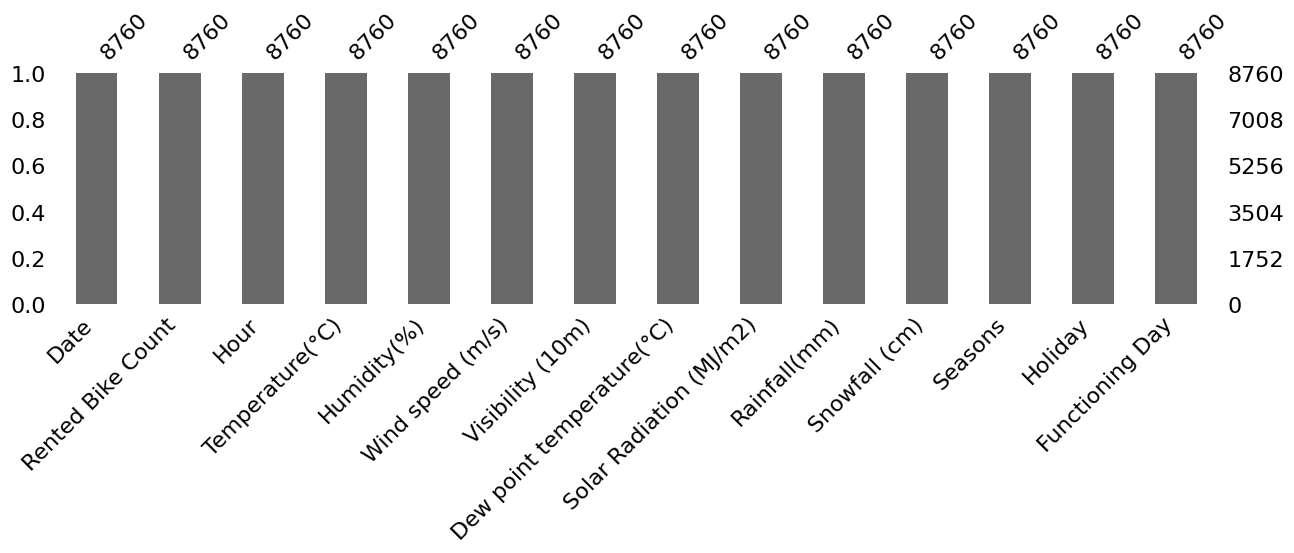

In [87]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(15,3))

### **Findings**
*  Dataset contains 8760 rows and 14 columns.
*  There are no Null values / Missing values & Duplicate values.
-  Date column need to convert in proper data types.
*  We have to convert some columns(Seasons,Holiday,Fuctioning Day) into numeric
   for Modeling.
*  Many of the column needs to Rename because, It contains white spacing and
   brackets with respective unite.  







  







In [88]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [89]:
# Rename columns for Ease of Analysing
df= df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [90]:

df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [91]:
# converting Date column into Day, month & Year columns (For better Analysing Dataset)
from datetime import datetime
import datetime as dt

df['Date']=df['Date'].astype('datetime64[ns]')
df['Day']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Year'] =df['Date'].dt.year


<ipython-input-91-a19146bc75bc>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=df['Date'].astype('datetime64[ns]')


In [92]:
#  Creating new column and Encoding with its weekend and its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [93]:
# check Dataset after Applying changes
df.head(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day       Day  Month  Year  \
0  Winter  No Holiday             Yes  Thursday      1  2017   
1  Winter  No Holiday             Yes  Thursday      1  2017   
2  Winter  No Holiday             Yes  Thursday      1  2017   
3  Winter  No Holiday             Yes  Thursday      1  2017   
4  Winter  No Holiday             Yes  Thursday      1  2017   

   Weekdays_or_weekend  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [94]:
# Now we can drop unnecessary columns.
df=df.drop(columns=['Date','Day','Year'],axis=1)


In [95]:
#Check dataset After droping columns
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Month  Weekdays_or_weekend  
0  No Holiday             Yes      1                    0  
1  No Holiday             Yes      1                    0  
2  No Holiday             Yes      1                    0  
3  No Holiday             Yes      1                    0  
4  No Holiday             Yes      1                    0



*   Basically 'Hour','Month' and 'Weekdays_or_weekend' colums are listed like
  Integer data type but its lies under catagory data type.
-   So we need to convert it form Integer to catagory data type for better
  analysis purpose.



In [96]:
# converting Data types of'Hour','Month' & 'Weekdays_or_weekend'

df["Hour"] = df["Hour"].astype("category")
df["Month"] = df["Month"].astype("category")
df["Weekdays_or_weekend"] = df["Weekdays_or_weekend"].astype("category")



In [97]:
# Checking Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  Weekdays_or_weekend    8760 non-null   c

# **2. Explor the data and find Relation among the features, Trends and Patterns.**

[Text(0.5, 1.0, ' Rented bikes count per Month ')]

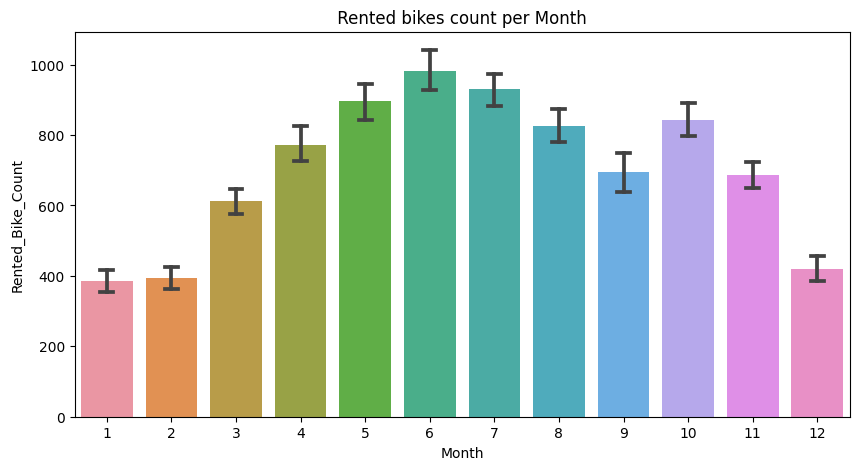

In [98]:
# Monthly data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title=' Rented bikes count per Month ')

### **The bar plot illustrates a conspicuous surge in the demand for rented bikes during the months spanning from May to October. Evidently, this temporal pattern is prominently pronounced within the confines of the summer season**

[Text(0.5, 1.0, 'Rented bikes count per weekdays or weekend ')]

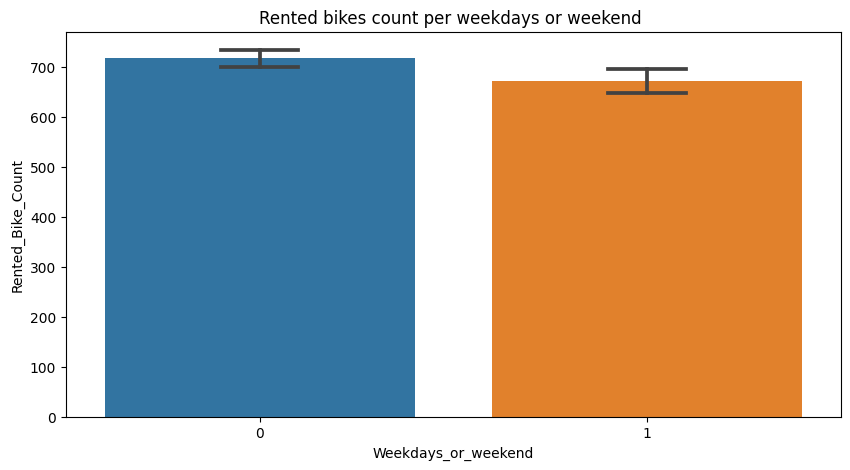

In [99]:
#Weekdays & weekend data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Weekdays_or_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Rented bikes count per weekdays or weekend ')

### **From this bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of working days.**

[Text(0.5, 1.0, ' Rented bikes count per weekdays_weekend ')]

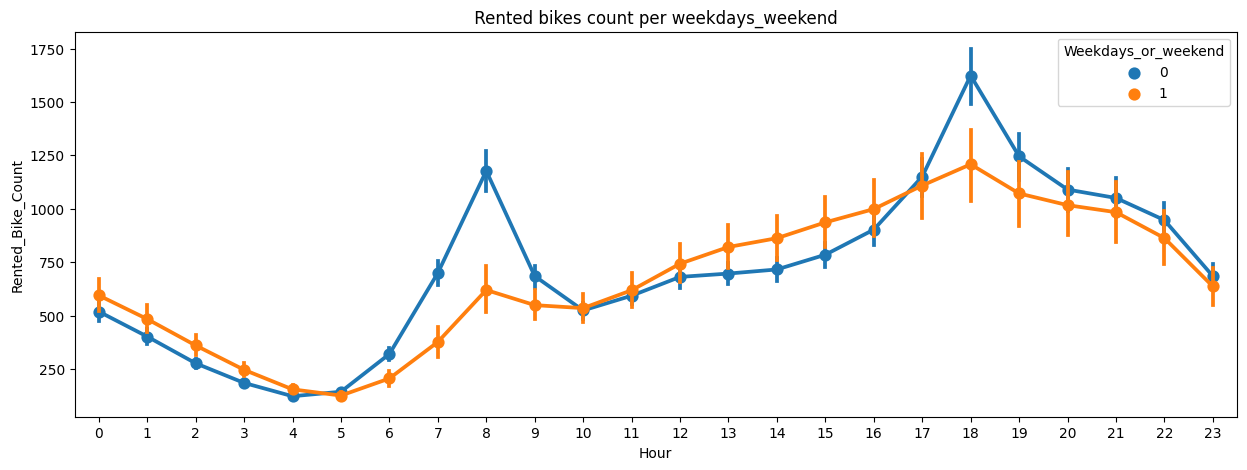

In [100]:
#Weekdays & weekend data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Weekdays_or_weekend',ax=ax)
ax.set(title=' Rented bikes count per weekdays_weekend ')

### **The temporal analysis discerns two distinct peaks in bike rental demand: during the hours of 7 AM to 9 AM and again from 5 PM to 7 PM.**
### **Concurrently, the data visualized by the orange color denotes weekends, where a discernible pattern emerges. Specifically, during weekend mornings, a notable decrease in bike rentals is observed. Nevertheless, as the afternoon progresses, precisely from 4 PM to 8 PM, a modest uptick in bike rental demand becomes discernible.**

[Text(0.5, 1.0, ' Rented Bikes Count bikes per Hour ')]

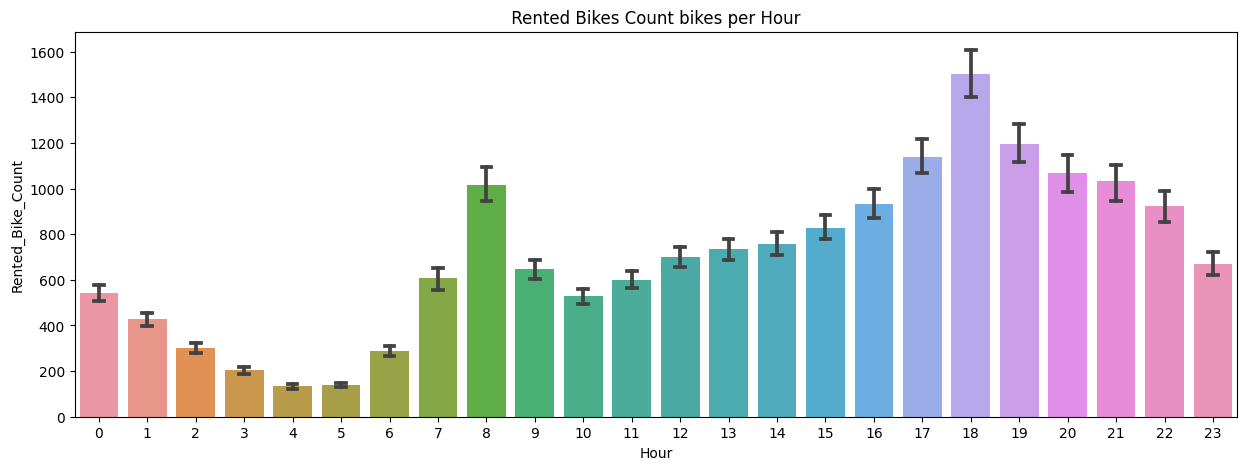

In [101]:
# Hourly data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title=' Rented Bikes Count bikes per Hour ')

### **The depicted graph illustrates the utilization patterns of rented bicycles across various hours, considering data aggregated throughout the entire year.**

### **Primarily, there is a discernible trend of increased bike rental activity during typical working hours, specifically from 7:00 AM to 9:00 AM and then again from 5:00 PM to 7:00 PM.**

[Text(0.5, 1.0, ' Rented bikes counts as per Functioning Days ')]

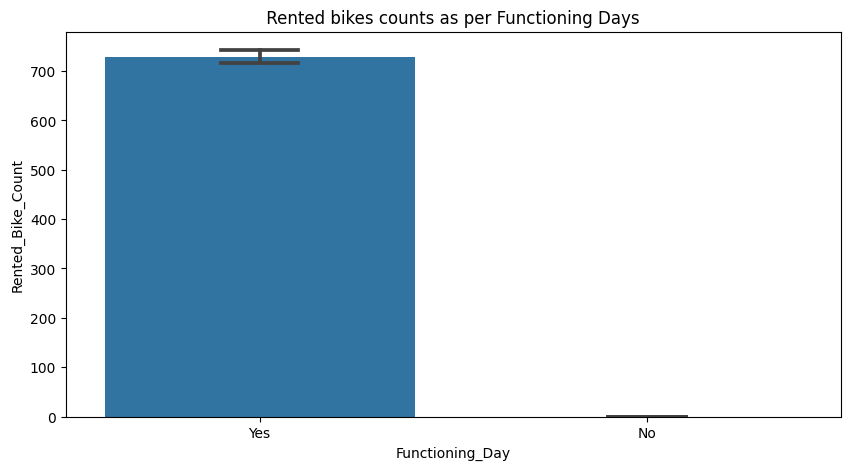

In [102]:
# Functioning Days data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title=' Rented bikes counts as per Functioning Days ')

[Text(0.5, 1.0, ' Rented bike counts as per Functioning Day ')]

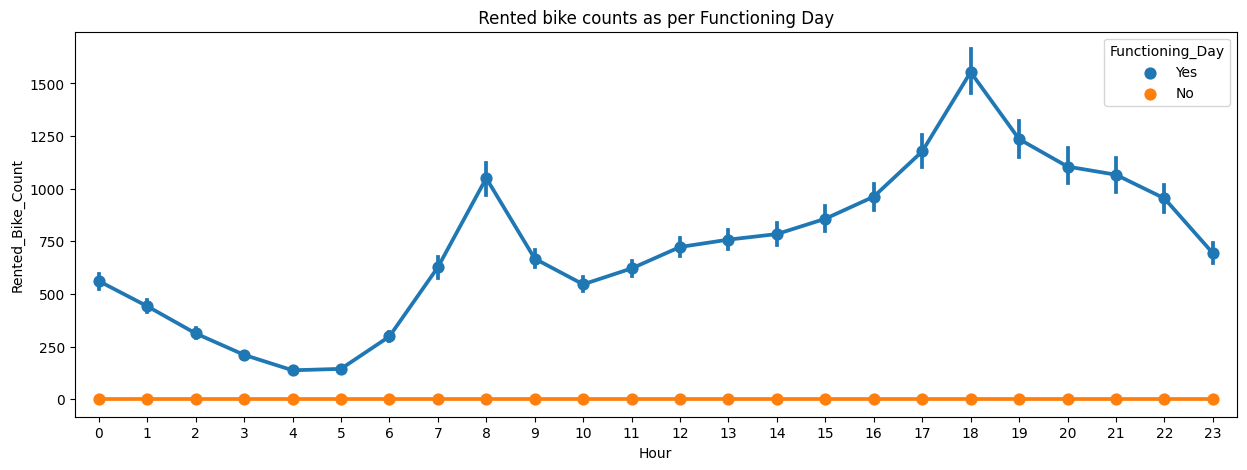

In [103]:
# Functioning Days data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title=' Rented bike counts as per Functioning Day ')

* **In the above bar plot and point plot which shows the use of rented bike in functioning day or not, and it clearly shows that,**
* **People dont use reneted bikes in no functioning day.**

[Text(0.5, 1.0, ' Rented bike counts as per Seasons ')]

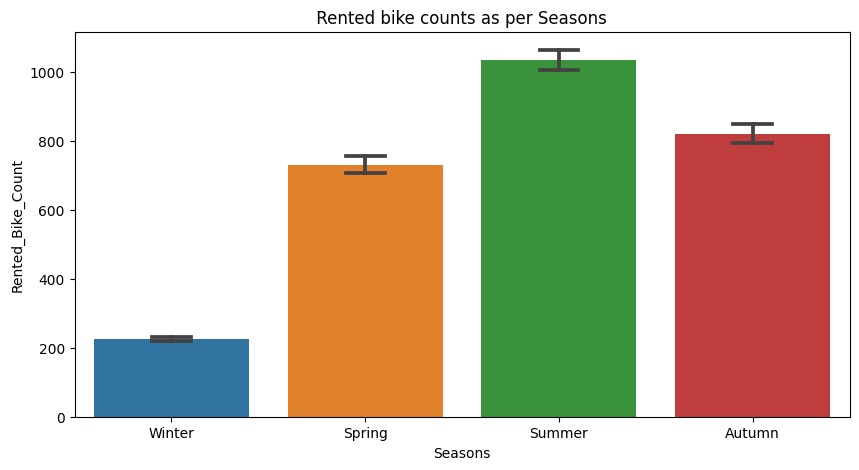

In [104]:
# Seasonal data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title=' Rented bike counts as per Seasons ')

[Text(0.5, 1.0, 'Rented bike counts as per seasons ')]

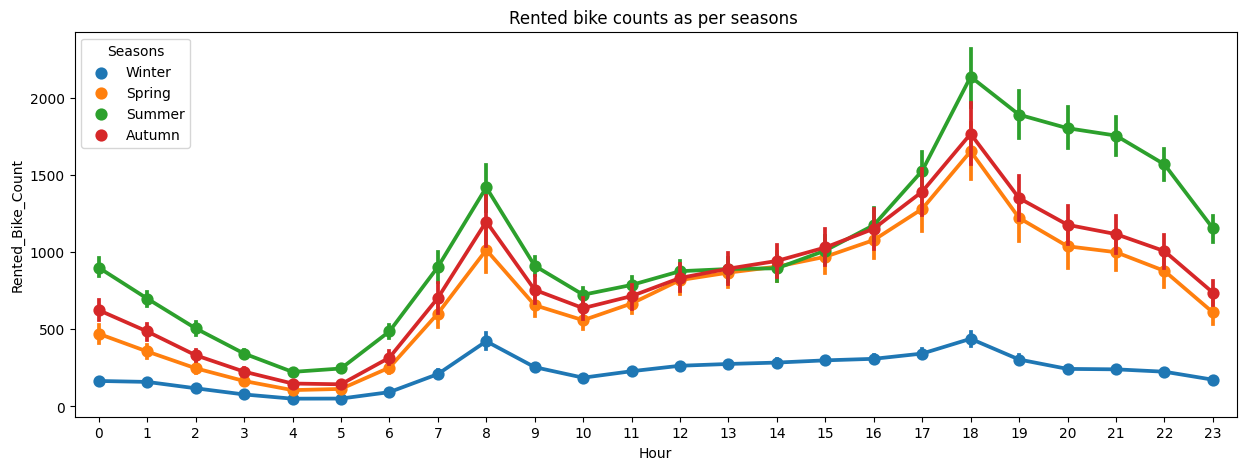

In [105]:
# Seasonal of data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Rented bike counts as per seasons ')

 ### **The presented bar plot and point plot illustrate the utilization patterns of rented bicycles across four distinct seasons. The data distinctly highlights the following trends:**

* ###  **During the summer season, there is a significant surge in the use of rented bicycles. This heightened utilization is particularly prominent during two distinct time intervals: from 7 AM to 9 AM, and from 7 PM to 5 PM.**

* ### **Conversely, the winter season exhibits a marked decrease in rented bicycle usage. This decline can be attributed to adverse weather conditions, specifically snowfall, which acts as a deterrent to bike rentals during this period.**

[Text(0.5, 1.0, ' Rented bike counts as per Holiday ')]

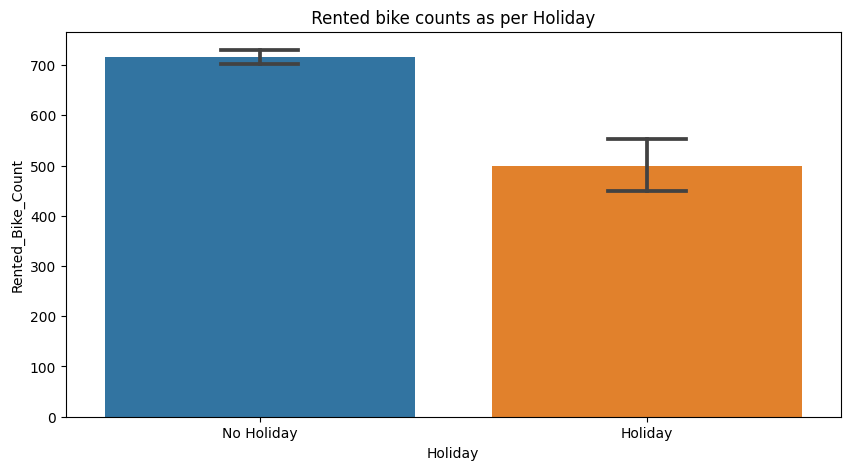

In [106]:
# Holiday data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title=' Rented bike counts as per Holiday ')

[Text(0.5, 1.0, 'Rented bike counts as per Holiday ')]

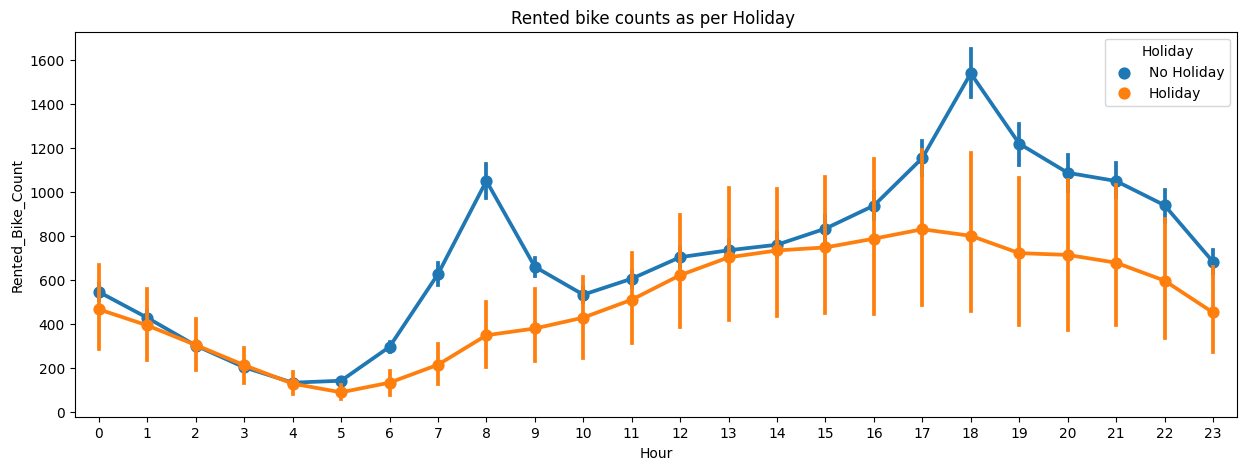

In [107]:
# Holiday data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Rented bike counts as per Holiday ')

### **The provided bar plot and point plot depict the rental bike utilization during holiday periods. Evidently, the visual representation underscores the observation that there is a discernible pattern of heightened rented bike usage between the hours of 2:00 PM and 8:00 PM on holidays.**

<Figure size 800x500 with 0 Axes>

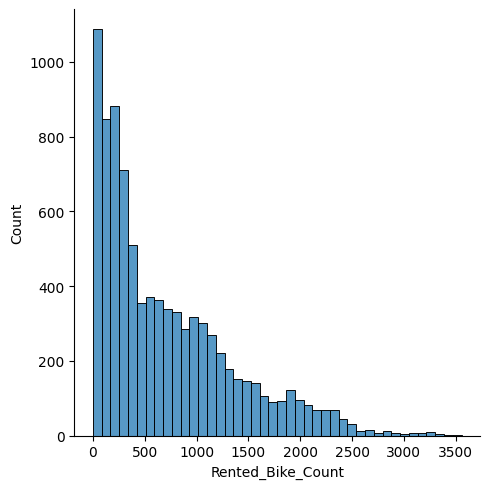

<Figure size 800x500 with 0 Axes>

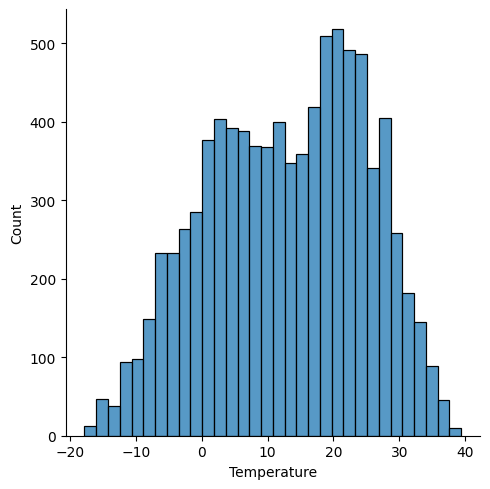

<Figure size 800x500 with 0 Axes>

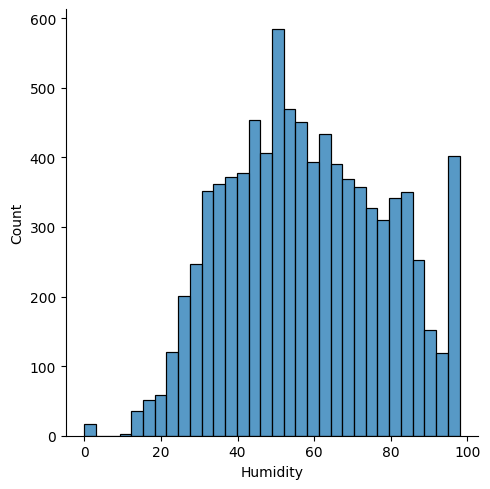

<Figure size 800x500 with 0 Axes>

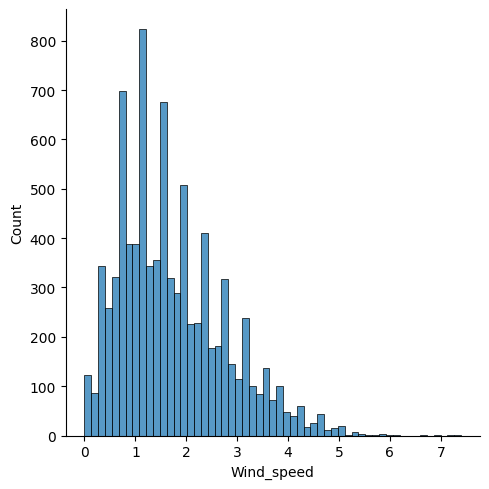

<Figure size 800x500 with 0 Axes>

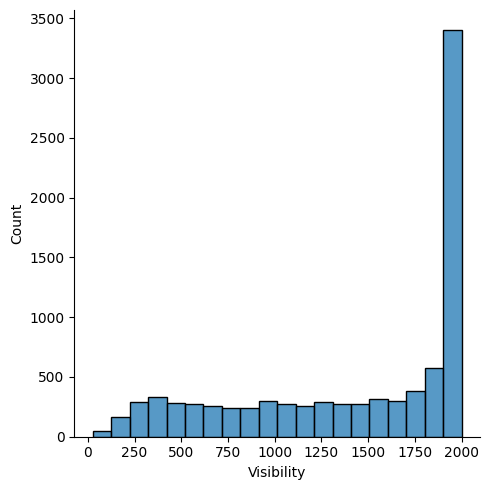

<Figure size 800x500 with 0 Axes>

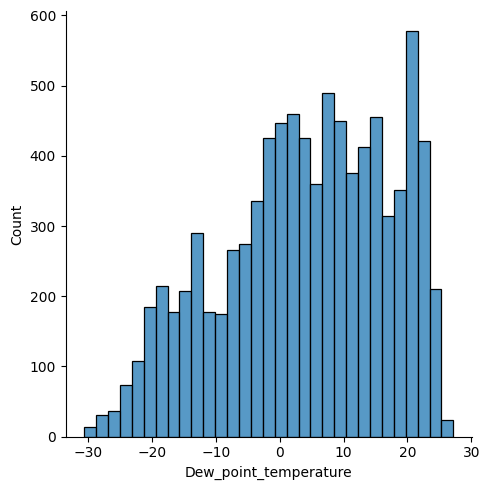

<Figure size 800x500 with 0 Axes>

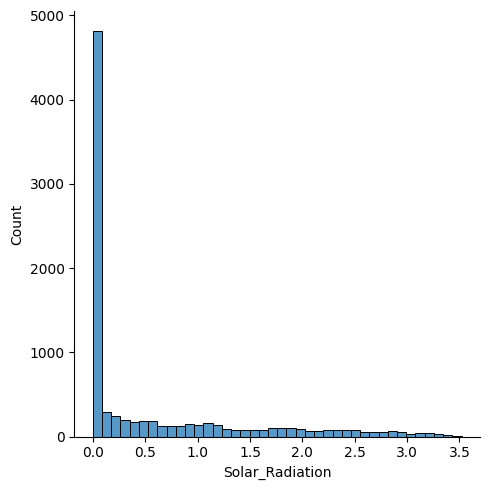

<Figure size 800x500 with 0 Axes>

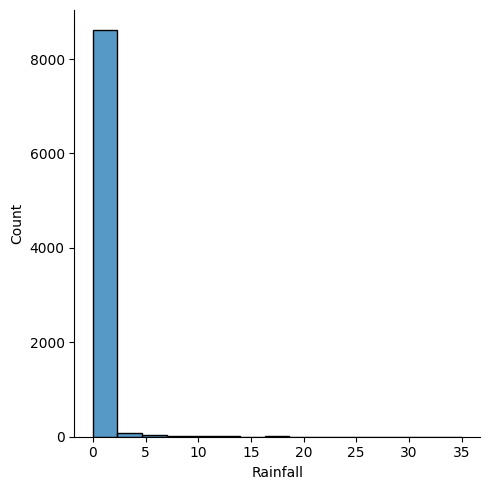

<Figure size 800x500 with 0 Axes>

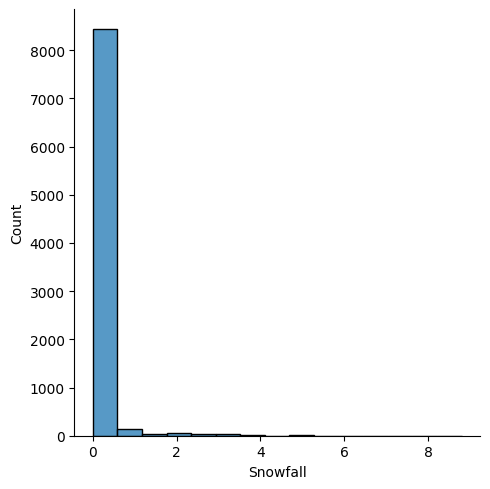

In [108]:
# Analyze the distribution of all numerical features

numerical_columns = list(df.select_dtypes(['int64', 'float64']).columns)
numerical_features = pd.Index(numerical_columns)

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col])
    plt.xlabel(col)
    plt.show()


### **Rented_Bike_Count for each group**





<ipython-input-109-1fb6d0b24029>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()


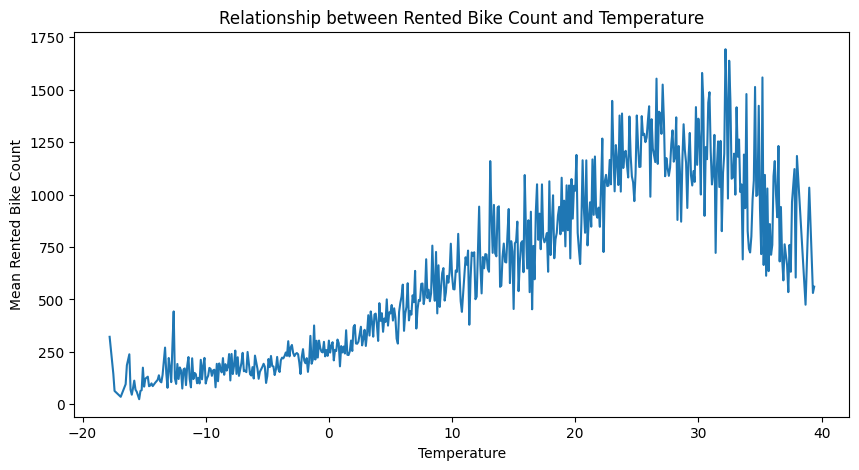

In [109]:
# Plot for Temperature
plt.figure(figsize=(10, 5))
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Temperature')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Temperature')
plt.show()

<ipython-input-110-0c930706c79f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()


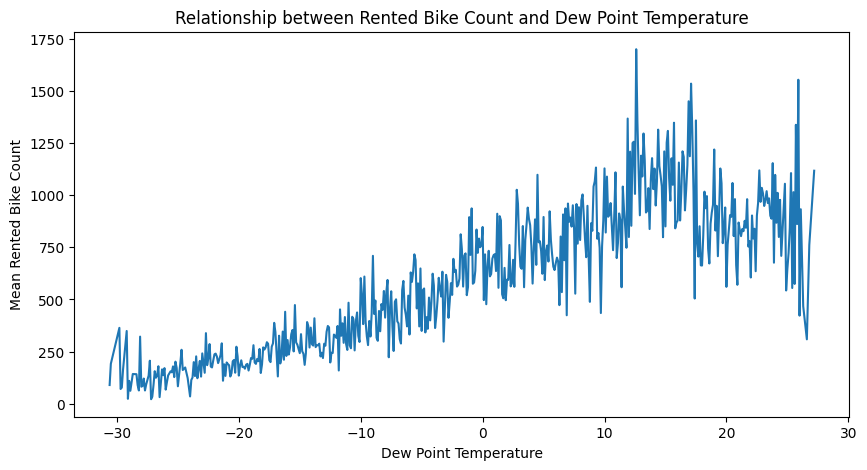

In [110]:
# Plot for Dew_point_temperature
plt.figure(figsize=(10, 5))
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Dew Point Temperature')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Dew Point Temperature')
plt.show()

<ipython-input-111-49a50d31d2a9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()


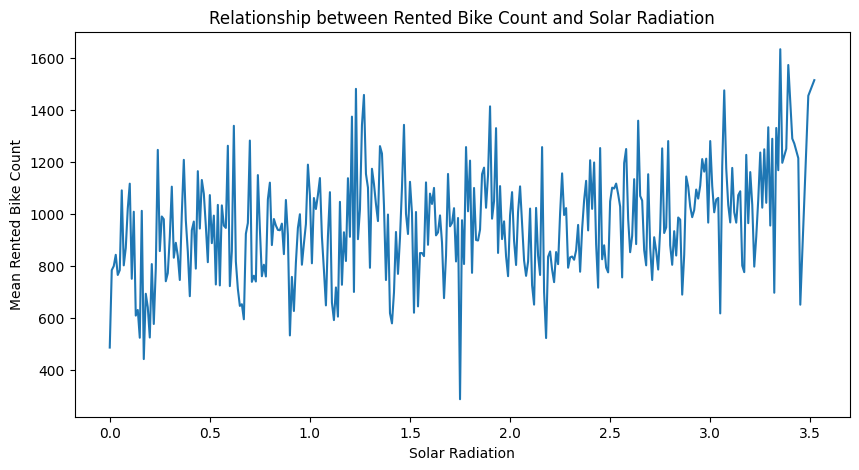

In [111]:
# Plot for Solar_Radiation
plt.figure(figsize=(10, 5))
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Solar Radiation')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Solar Radiation')
plt.show()

<ipython-input-112-7bc37a697b9e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


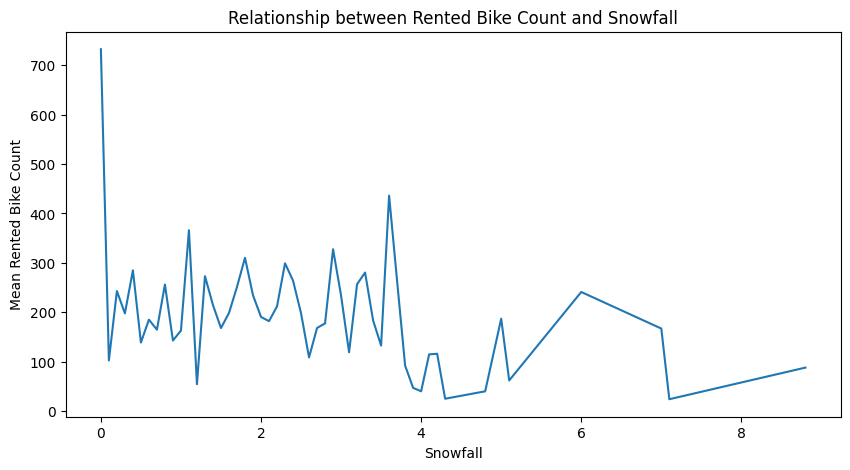

In [112]:
# Plot for Snowfall
plt.figure(figsize=(10, 5))
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Snowfall')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Snowfall')
plt.show()

<ipython-input-113-1941073f7355>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


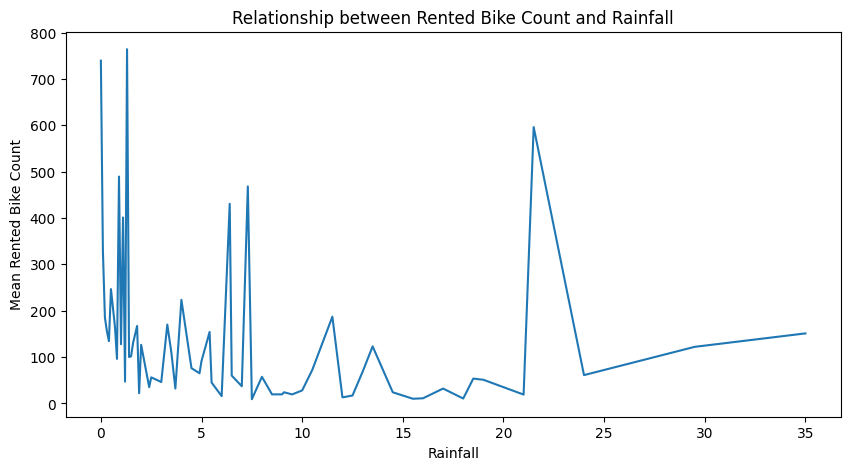

In [113]:
# Plot for Rainfall
plt.figure(figsize=(10, 5))
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Rainfall')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Rainfall')
plt.show()

<ipython-input-114-d06fd2b2b93e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()


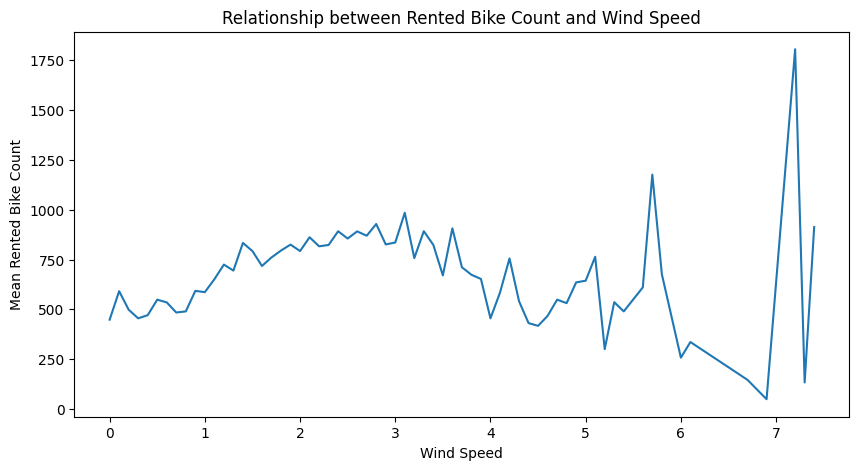

In [114]:
# Plot for Wind_speed
plt.figure(figsize=(10, 5))
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()
plt.xlabel('Wind Speed')
plt.ylabel('Mean Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Wind Speed')
plt.show()



- **Observation:** The demand for rented bikes appears to have a uniform distribution across different wind speeds.
  
- **Finding:** However, an interesting pattern emerges at a wind speed of 7 m/s.

- **Notable Trend:** At a wind speed of 7 m/s, there is a significant increase in bike rental demand.

- **Insight:** This suggests that people tend to prefer bike rides when there is a gentle breeze, indicating a potential correlation between mild windy conditions and increased bike usage.



## **3.Clean and pre process Data**

### **Check for Distribution**

<ipython-input-115-73da86fbf0a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Rented_Bike_Count'], hist=True, color="r")


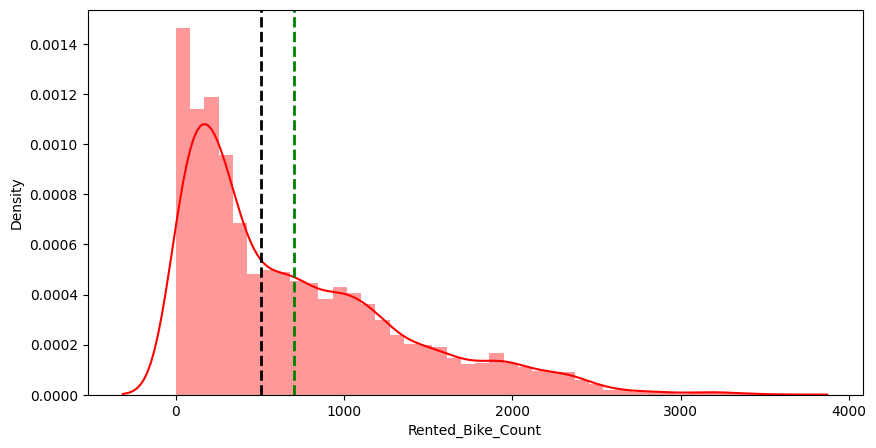

In [115]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10, 5))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax = sns.distplot(df['Rented_Bike_Count'], hist=True, color="r")
ax.axvline(df['Rented_Bike_Count'].mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


### **Check for Outliers**

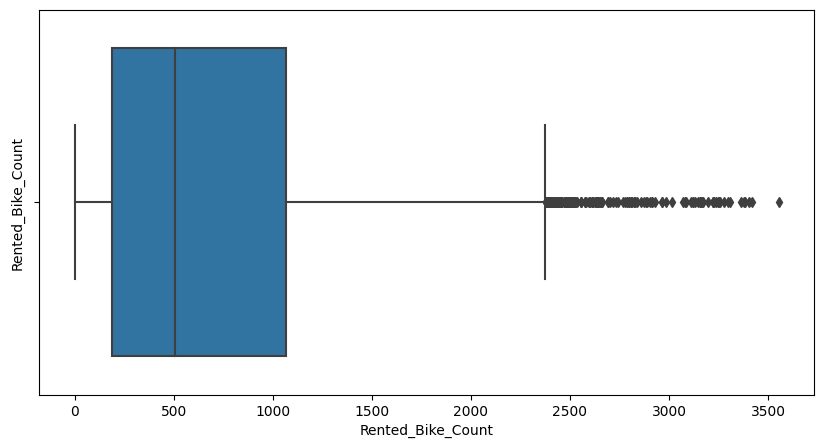

In [116]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,5))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

-  **The box plot and distplot of Rented Bike Count reveals moderate right skewness in the data distribution.**
-  **Linear regression assumes a normal distribution of the dependent variable. Therefore, addressing the skewness is essential for accurate modeling.**
- **Outliers are detected in the Rented Bike Count column. Further data preprocessing techniques are required to handle it.**

<ipython-input-117-243c0ff7c5c8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="g")


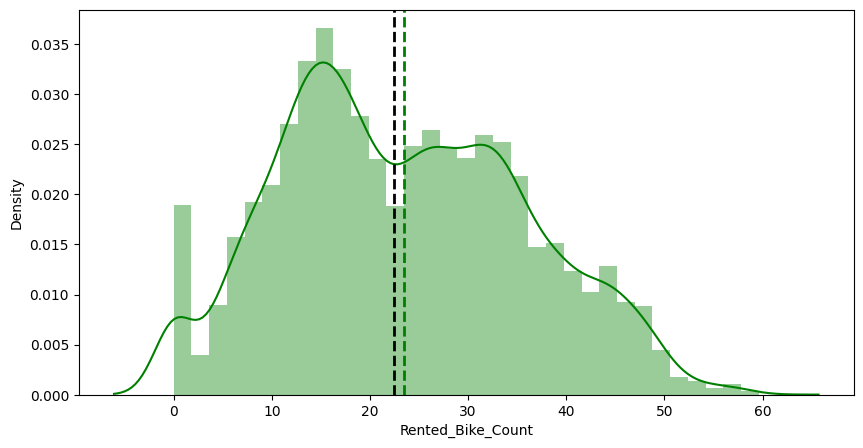

In [117]:
#Applying square root to Rented Bike Count to improve skewness and remove outliers
plt.figure(figsize=(10,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="g")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='g', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

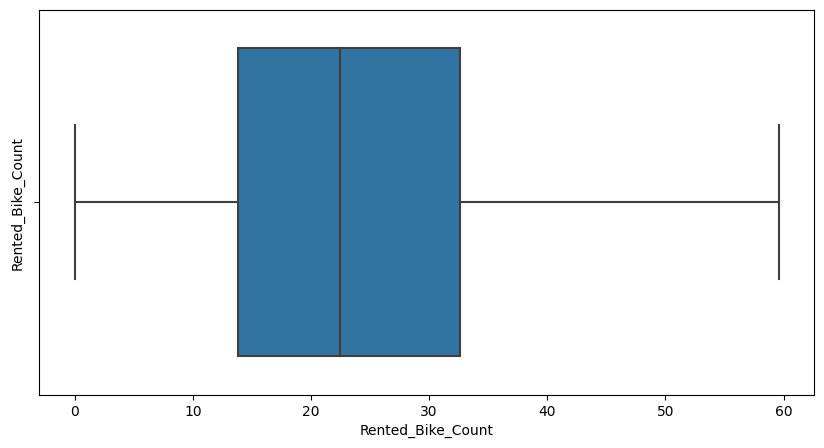

In [118]:
#Boxplot to Check for outliers
plt.figure(figsize=(10,5))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

- **After applying the square root transformation to the skewed `Rented Bike Count` variable, the distribution becomes almost normal.**
- **This transformation aligns with the general rule of using the square root to mitigate skewness, enhancing the data's suitability for statistical analyses like linear regression, which assumes a normal distribution of variables.**

##**4.Checking of Correlation between variables**

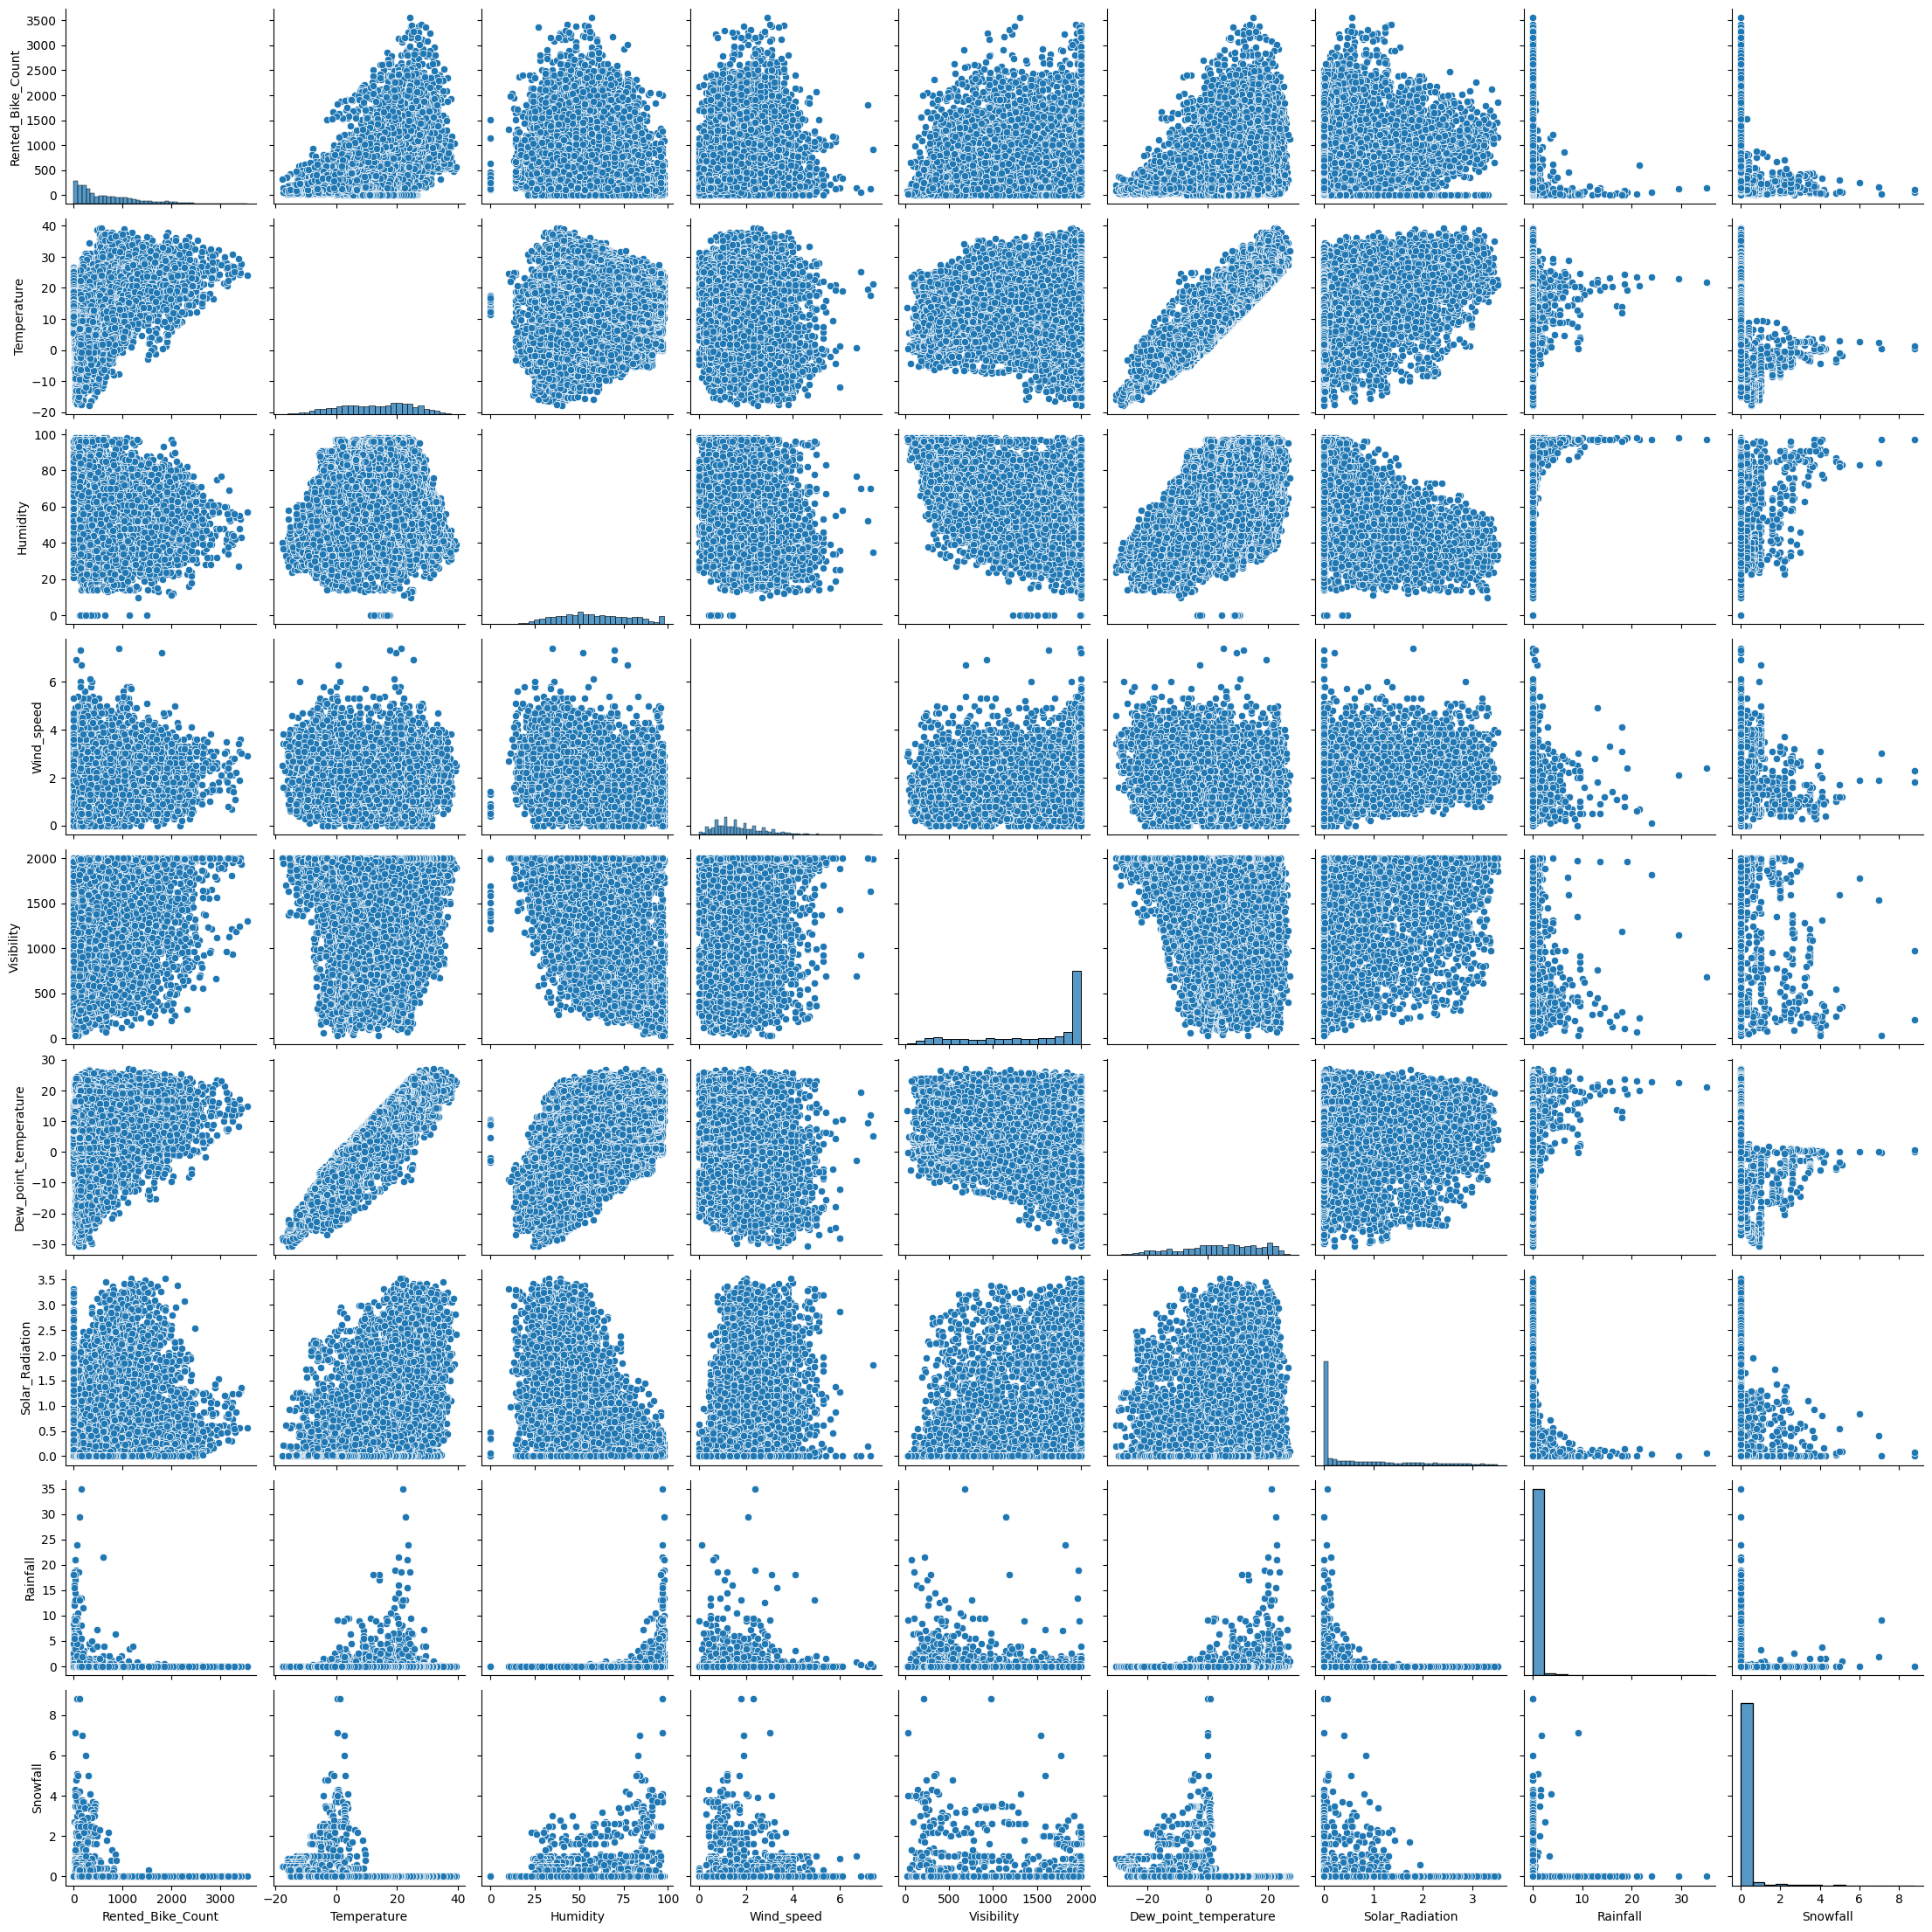

In [119]:
# pair plot
sns.pairplot(df)
plt.show()

In [120]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-120-5811ebcaccad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.121108   
Temperature                     0.538558     1.000000  0.159371   -0.036252   
Humidity                       -0.199780     0.159371  1.000000   -0.336683   
Wind_speed                      0.121108    -0.036252 -0.336683    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.171507   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.176486   
Solar_Radiation                 0.261837     0.353505 -0.461919    0.332274   
Rainfall                       -0.123074     0.050282  0.236397   -0.019674   
Snowfall                       -0.141804    -0.218405  0.108183   -0.003554   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.261837   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind_speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew_point_temperature   -0.176630               1.000000         0.094381   
Solar_Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.123074 -0.141804  
Temperature            0.050282 -0.218405  
Humidity               0.236397  0.108183  
Wind_speed            -0.019674 -0.003554  
Visibility            -0.167629 -0.121695  
Dew_point_temperature  0.125597 -0.150887  
Solar_Radiation       -0.074290 -0.072301  
Rainfall               1.000000  0.008500  
Snowfall               0.008500  1.000000

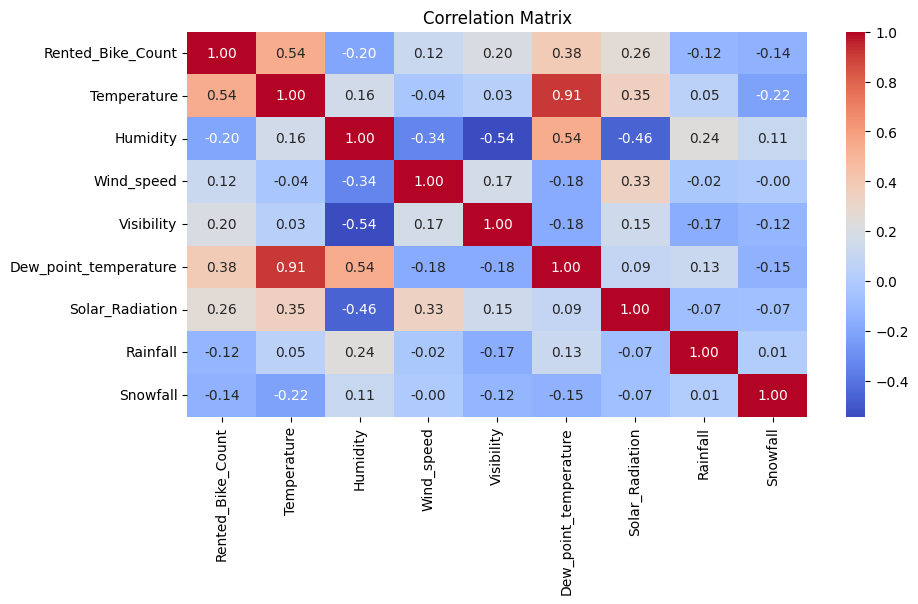

In [121]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Positive Correlations with Rented Bike Count:**
- Temperature, dew point temperature, and solar radiation are strongly positively correlated with the number of rented bikes.
  
**Negative Correlations with Rented Bike Count:**
- Humidity and rainfall exhibit significant negative correlations with the number of rented bikes, indicating a decrease in rentals during high humidity and rainy conditions.

## **Regression Plot**

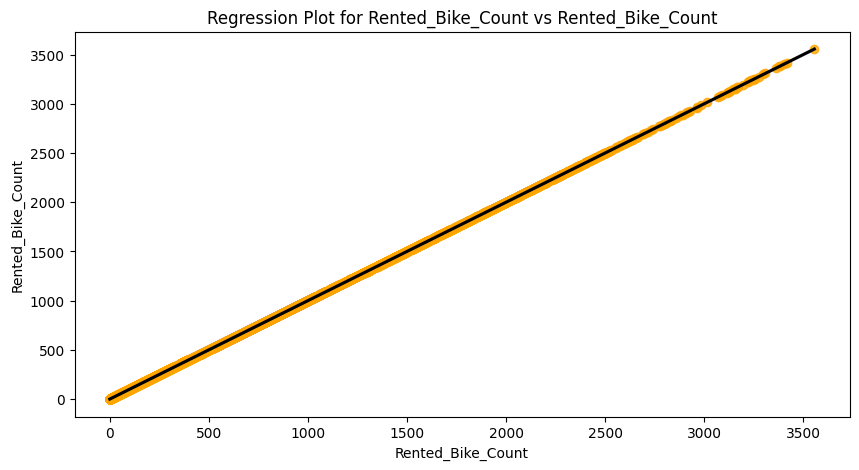

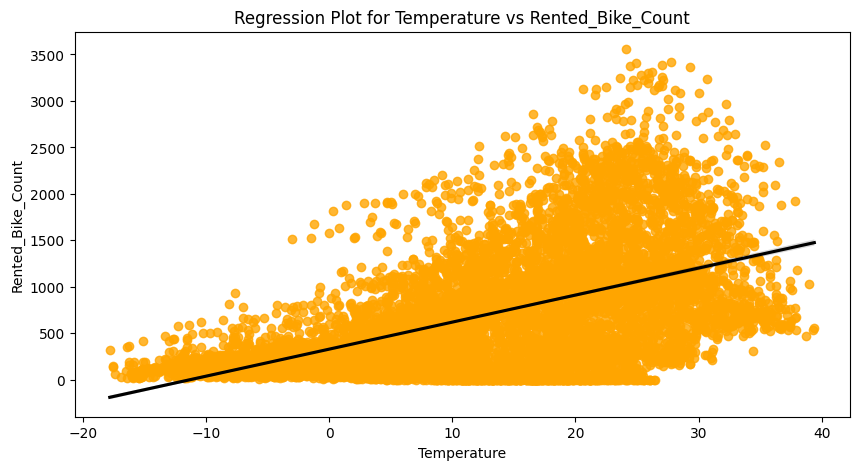

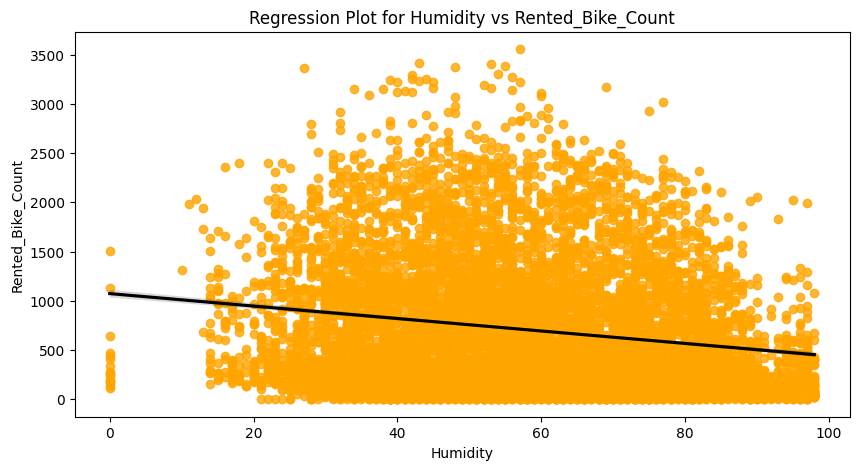

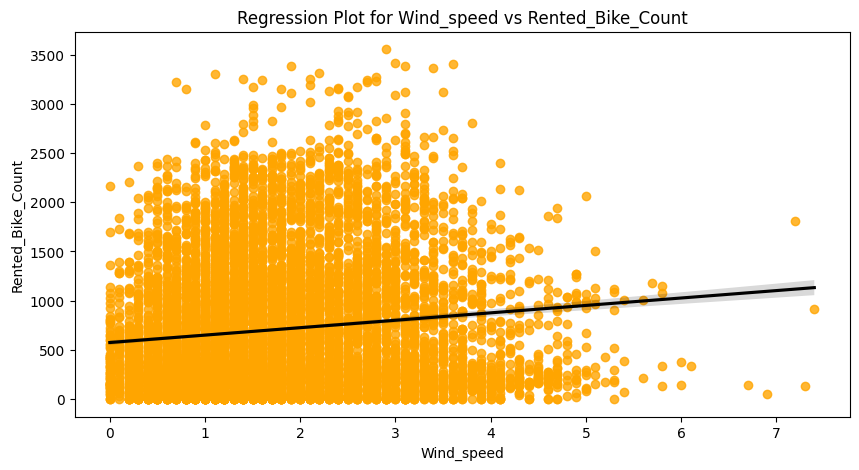

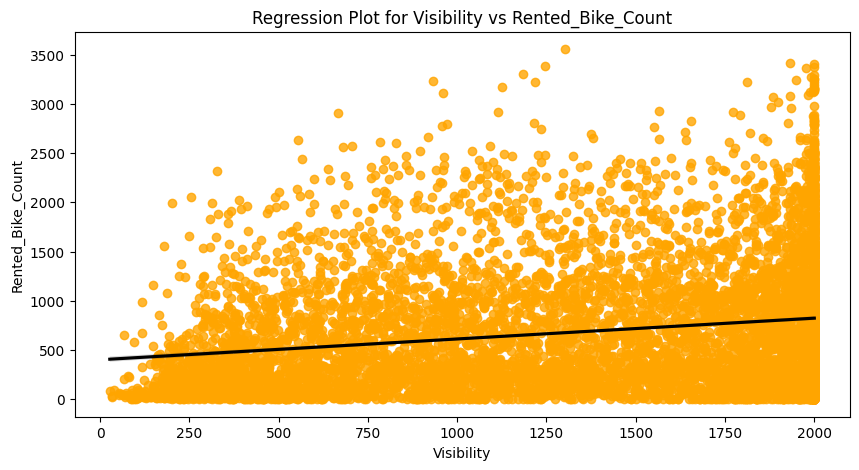

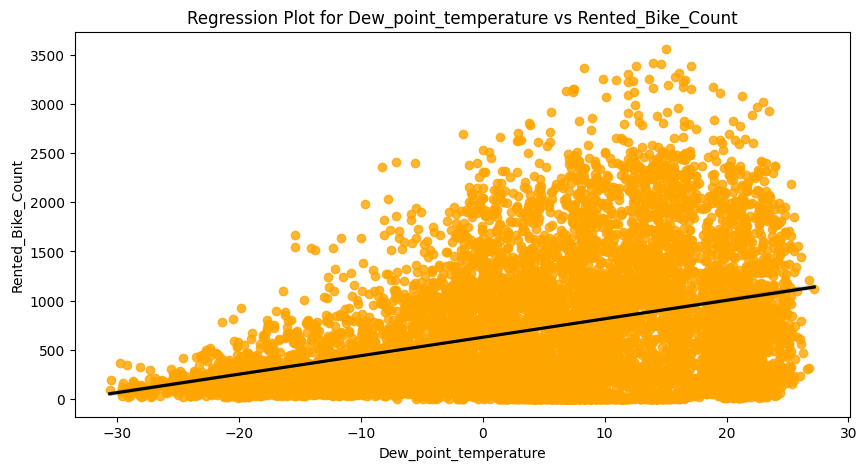

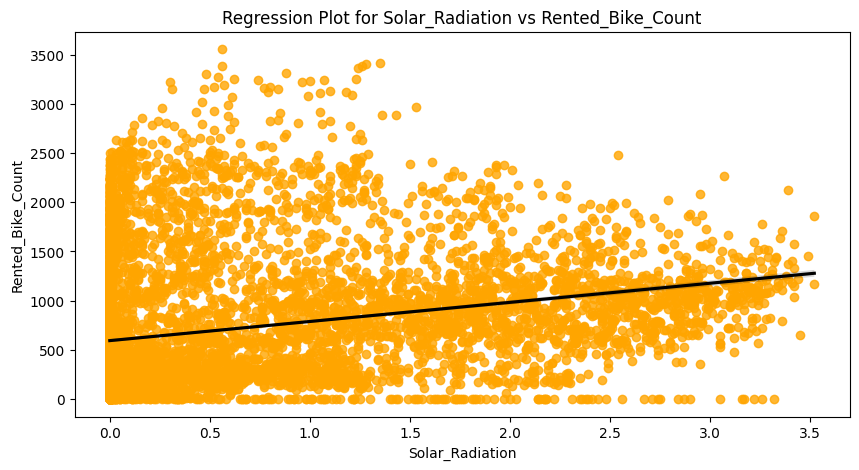

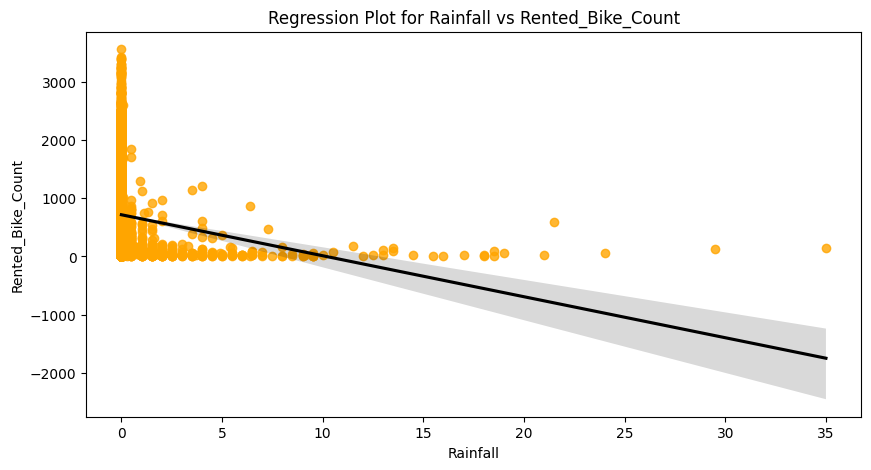

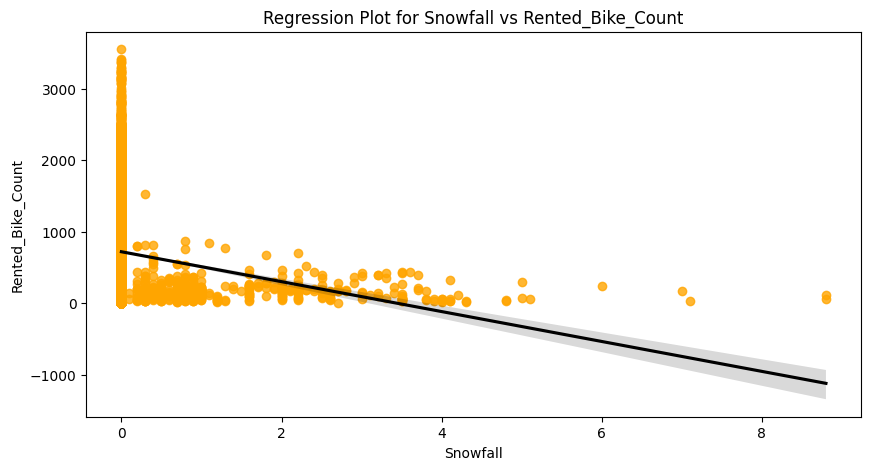

In [122]:
# Iterate through each numerical feature and create regression plots
for col in numerical_features:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.regplot(x=df[col], y=df['Rented_Bike_Count'], scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    plt.title(f'Regression Plot for {col} vs Rented_Bike_Count')
    plt.show()


- **The regression plots indicate that 'Temperature', 'Wind Speed', 'Visibility', 'Dew Point Temperature', and 'Solar Radiation' are positively correlated with bike rental counts, meaning rentals increase as these factors rise.**
- **Conversely, 'Rainfall', 'Snowfall', and 'Humidity' exhibit negative correlations, indicating reduced bike rentals during higher rainfall, snowfall, and humidity conditions.**

- **The strong positive correlation between the 'Temperature' and 'Dew Point Temperature' columns suggests a high degree of similarity in their variations**.  
- **Consequently, dropping the 'Dew Point Temperature(°C)' column does not significantly impact the analysis outcome, as it closely mirrors the information captured by the 'Temperature' column.**

In [123]:
# Droping the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)

In [124]:
df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

  Month Weekdays_or_weekend  
0     1                   0  
1     1                   0  
2     1                   0  
3     1                   0  
4     1                   0

## **5.Data Pre Processing**

In [125]:
# Creating Dummy variable
categorical_features = list(df.select_dtypes(['object', 'category']).columns)
categorical_features = pd.Index(categorical_features)
print(categorical_features)


Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')


In [126]:
# Creating a copy of the original DataFrame
df_copy = df.copy()

#  one-hot encoding
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

# Applying one-hot encoding to each categorical feature in the copy DataFrame
for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)

# Display the first few rows of the modified DataFrame
df_copy.head()


Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  Month_4  Month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
0        0        0        0        0         0         0         0   
1        0        0        0        0         0         0         0   
2        0        0        0        0         0         0         0   
3        0        0        0        0         0         0         0   
4        0        0        0        0         0         0         0   

   Weekdays_or_weekend_1  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 48 columns]

- **Categorical Data Handling:** Datasets often include categorical values; to use them efficiently in programming and machine learning, we create dummy variables through techniques like one-hot encoding.
- **Enhanced Categorical Representation:** One-hot encoding enhances categorical data representation, vital for machine learning. Categorical values are converted into numerical form, enabling compatibility with algorithms that cannot process raw categorical data, essential for both input and output variables.

### **Train Test split for regression**


In [127]:
#Creating the dataset for independent and dependent variables
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
Y = np.sqrt(df_copy['Rented_Bike_Count'])

In [128]:
# Independent variable dataset
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  Month_4  Month_5  Month_6  Month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   Month_8  Month_9  Month_10  Month_11  Month_12  Weekdays_or_weekend_1  
0        0        0         0         0         0                      0  
1        0        0         0         0         0                      0  
2        0        0         0         0         0                      0  
3        0        0         0         0         0                      0  
4        0        0         0         0         0                      0  

[5 rows x 47 columns]

In [129]:
# Dependent variable dataset
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [131]:
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


## **Feature Scaling**

In [132]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [133]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [134]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[-0.74954694,  1.22697808, -0.60031734, ...,  3.27599494,
        -0.30614374,  1.56602794],
       [ 0.93615918, -0.54181953,  0.55489426, ..., -0.30525078,
        -0.30614374, -0.63855821],
       [-1.65916064, -1.22968527,  0.26609136, ..., -0.30525078,
        -0.30614374,  1.56602794],
       ...,
       [ 1.06133538, -0.05048686,  0.07355609, ..., -0.30525078,
        -0.30614374, -0.63855821],
       [-0.37401835,  0.04777967,  0.36235899, ..., -0.30525078,
        -0.30614374, -0.63855821],
       [-0.47415931,  1.22697808,  1.51757059, ..., -0.30525078,
        -0.30614374,  1.56602794]])

# **6.Model Implementation**

## **Training Data**

In [135]:
# All model performance on trainig Dataset
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define a list of regression algorithms to evaluate
regression_algorithms = [
    LinearRegression(),
    Lasso(random_state=42),
    Ridge(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Mean Squared Error': [],
    'Mean Absolute Error': [],
    'R2 Score': [],
    'Training Time (s)': []
}

# Apply the regression algorithms and calculate performance metrics for training data
for algorithm in regression_algorithms:
    start_time = time.time()

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, Y_train)
    y_train_pred = algorithm.predict(X_train)

    mse = mean_squared_error(Y_train, y_train_pred)
    mae = mean_absolute_error(Y_train, y_train_pred)
    r2 = r2_score(Y_train, y_train_pred)

    end_time = time.time()
    training_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Mean Squared Error'].append(mse)
    results_train['Mean Absolute Error'].append(mae)
    results_train['R2 Score'].append(r2)
    results_train['Training Time (s)'].append(training_time)

# Create a dataframe for the training data results
df_train_results = pd.DataFrame(results_train)
df_train_results


Algorithm  Mean Squared Error  Mean Absolute Error  R2 Score  \
0       LinearRegression           37.606306             4.658245  0.755788   
1                  Lasso           57.773308             5.907325  0.624826   
2                  Ridge           37.606312             4.658257  0.755788   
3  DecisionTreeRegressor            0.000000             0.000000  1.000000   
4  RandomForestRegressor            2.096659             0.952410  0.986385   

   Training Time (s)  
0           0.014036  
1           0.006425  
2           0.004498  
3           0.091358  
4           4.343762

## **Test Data**

In [136]:
# Initialize the results dictionary for test data
results_test = {
    'Algorithm': [],
    'Mean Squared Error': [],
    'Mean Absolute Error': [],
    'R2 Score': [],
    'Prediction Time (s)': []
}

# Apply the regression algorithms and calculate performance metrics for test data
for algorithm in regression_algorithms:
    start_time = time.time()

    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    mse = mean_squared_error(Y_test, y_test_pred)
    mae = mean_absolute_error(Y_test, y_test_pred)
    r2 = r2_score(Y_test, y_test_pred)

    end_time = time.time()
    prediction_time = end_time - start_time

    results_test['Algorithm'].append(algorithm_name)
    results_test['Mean Squared Error'].append(mse)
    results_test['Mean Absolute Error'].append(mae)
    results_test['R2 Score'].append(r2)
    results_test['Prediction Time (s)'].append(prediction_time)

# Create a dataframe for the test data results
df_test_results = pd.DataFrame(results_test)
df_test_results


Algorithm  Mean Squared Error  Mean Absolute Error  R2 Score  \
0       LinearRegression           37.563744             4.749981  0.762204   
1                  Lasso           58.987630             6.023969  0.626581   
2                  Ridge           37.565294             4.750069  0.762194   
3  DecisionTreeRegressor           29.605944             3.463945  0.812581   
4  RandomForestRegressor           15.934513             2.591801  0.899127   

   Prediction Time (s)  
0             0.010763  
1             0.007550  
2             0.004126  
3             0.009760  
4             0.096771

### **Observations:**
- **Decision Tree Regressor and Random Forest Regressor outperform Linear Regression, Lasso Regression, and Ridge Regression on both the training and test datasets.**
- **Random Forest Regressor shows significantly lower Mean Squared Error and Mean Absolute Error compared to other models on the test dataset, indicating better predictive performance.**
- **Linear Regression, Lasso Regression, and Ridge Regression exhibit similar performance on the test data, with moderate R2 scores around 0.76.**
- **Decision Tree Regressor achieves a good balance between accuracy and interpretability on the test data, outperforming linear models in terms of R2 score.**
- **Random Forest Regressor has a longer training time due to its complexity, but it provides superior accuracy on the test data.**
- **Decision Tree Regressor and Random Forest Regressor are recommended for this specific prediction task due to their higher accuracy metrics**.

## **Linear regression:**

In [137]:
# Fitting model
linear_reg_model= LinearRegression().fit(X_train, Y_train)

In [138]:
#Checking the score of the linear regression model
linear_reg_model.score(X_train,Y_train)

0.7557884266778845

In [139]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_Rg = linear_reg_model.predict(X_train)
Y_test_pred_Rg = linear_reg_model.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 :",a_r2_test)


In [141]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_Rg,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 37.56374388373628
RMSE : 6.128926813377386
R2 : 0.7622042213515061
Adjusted R2 : 0.7569864801766792


In [142]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,5))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

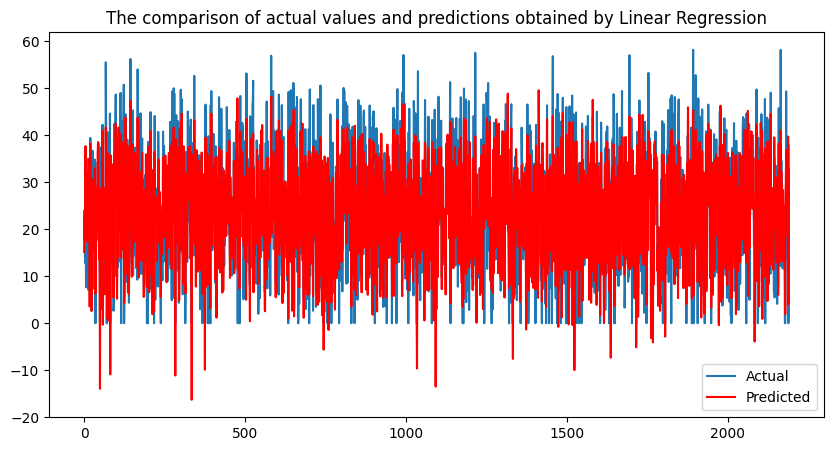

In [143]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_Rg,'Linear Regression')

- **R2 Score of 0.76:** The R2 score of 76% indicates that our linear model explains 76% of the variance in the test data, suggesting a relatively good fit of the model to the data.

- **Residual Visualization:** Examining the residuals graphically can confirm that they are evenly scattered around zero and there are no discernible patterns, indicating a good model fit.

## **Lasso Regression:**

In [144]:
# Initializing and training Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)

# Predicting values of the target variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

# Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso, 'Lasso Regression')


The evaluation metrics for Lasso Regression are given as:
MSE : 58.98763049169605
RMSE : 7.680340519254082
R2 : 0.6265811638260137
Adjusted R2 : 0.618387566580366


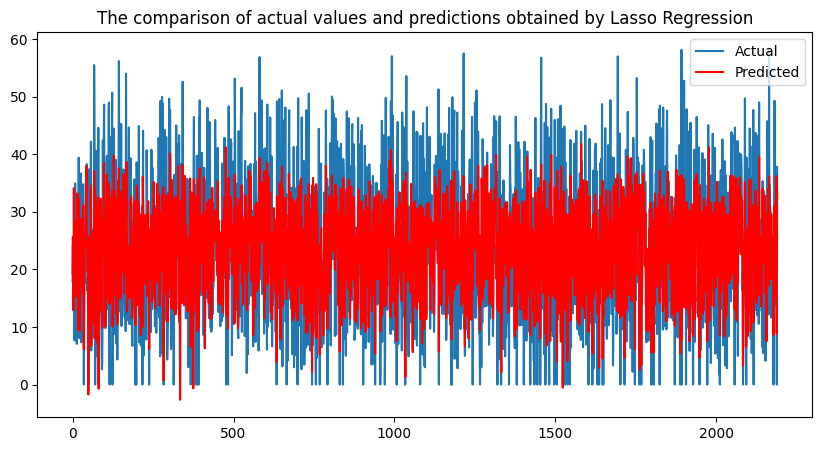

In [145]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

- **The performance of the model has diminished when employing the Lasso regression technique.**

## **Ridge Regression:**

In [146]:
# Fitting the Ridge regression model on the dataset with the appropriate alpha value
ridge_reg_model = Ridge(alpha=1.0).fit(X_train, Y_train)

# Predicting values of the target variable on the test set
Y_test_pred_ridge = ridge_reg_model.predict(X_test)

# Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge, 'Ridge Regression')


The evaluation metrics for Ridge Regression are given as:
MSE : 37.56529420663483
RMSE : 6.129053287958494
R2 : 0.7621944070943875
Adjusted R2 : 0.7569764505740496


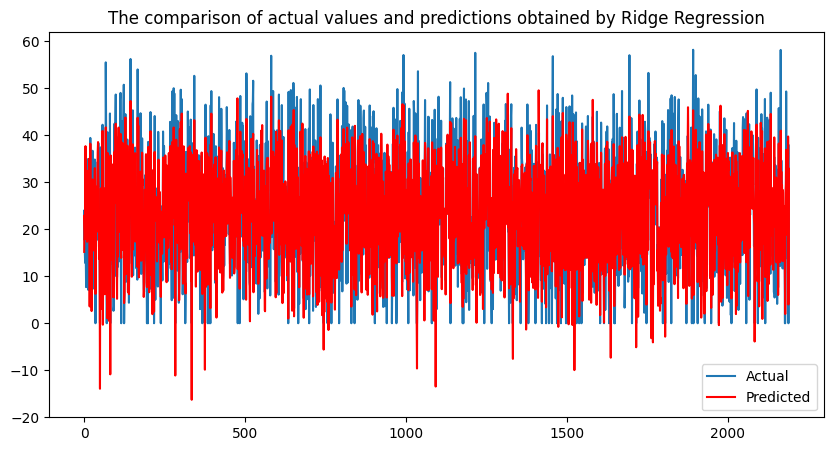

In [147]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

- **R2 Score of 0.76:** The R2 score of 76% this is same as linear regression  model indicates that our linear model explains 76% of the variance in the test data, suggesting a relatively good fit of the model to the data.

- **Residual Visualization:** Examining the residuals graphically can confirm that they are evenly scattered around zero and  there are no discernible patterns, indicating a good model fit.

## **Decision Tree:**

In [148]:
# Initializing and training Decision Tree Regressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, Y_train)

# Making predictions
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)


In [149]:
# Calculating the evaluation metrics for Decision Tree Regression
eval_metrics(y_pred_test_dt, 'Decision Tree')


The evaluation metrics for Decision Tree are given as:
MSE : 29.826612675551562
RMSE : 5.461374614101432
R2 : 0.8111838210913617
Adjusted R2 : 0.8070407956904718


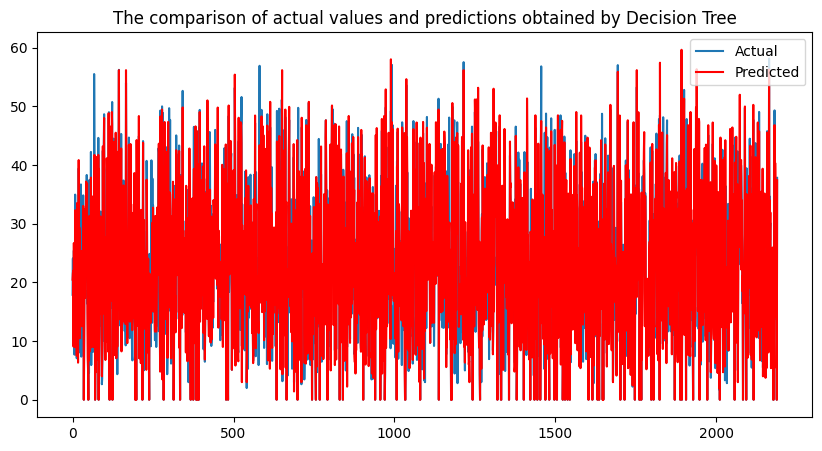

In [150]:
#Plotting the comparison between actual and predicted values obtained by Decision Tree
plot_comparison(y_pred_test_dt,'Decision Tree')

- **R2 Score of 0.81:** An R2 score of 0.81 suggests that our linear model accounts for 81% of the variance in the test data. This indicates a moderate fit of the model, indicating a significant but not perfect explanation of the variance.

- **Residual Visualization:** Visualizing the residuals demonstrates that they are evenly scattered around zero, without any noticeable patterns. This uniform distribution suggests a moderate fit of the model, indicating that the model's errors are random and not systematically biased.

## **Random Forest Regression:**

In [151]:
# Creating a Random Forest Regression model
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train,Y_train)

RandomForestRegressor()

In [152]:
# Making predictions on train and test data
Y_train_pred_RF = rand_forest.predict(X_train)
Y_test_pred_RF = rand_forest.predict(X_test)

In [153]:
# Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_RF, 'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 15.845693475992
RMSE : 3.9806649539985153
R2 : 0.8996894710492289
Adjusted R2 : 0.8974884463710374


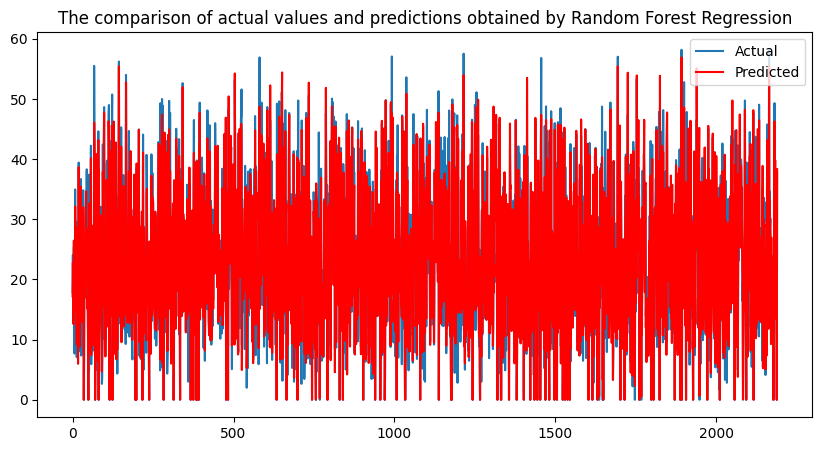

In [154]:
#Plotting the comparison between actual and predicted values obtained by Decision Tree
plot_comparison(Y_test_pred_RF,'Random Forest Regression')

- **R2 Score of 0.89:** An R2 score of 0.89 indicates that our Random Forest model explains 89% of the variance in the test data. This signifies a strong fit of the model, suggesting a substantial and accurate explanation of the variance.

- **Residual Visualization:** Examining the residuals graphically confirms that they are evenly scattered around zero, showing no discernible patterns. This uniform distribution underscores the strong fit of the model, indicating that the model's errors are random and not systematically biased.

## **7.Model Explainability**

## **Feature Importance:**

In [155]:
# For Decision Trees or Random Forests
importances = decision_regressor.feature_importances_  # Replace decision_tree_model with your trained model
features = X.columns  # Assuming X is your feature dataset
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


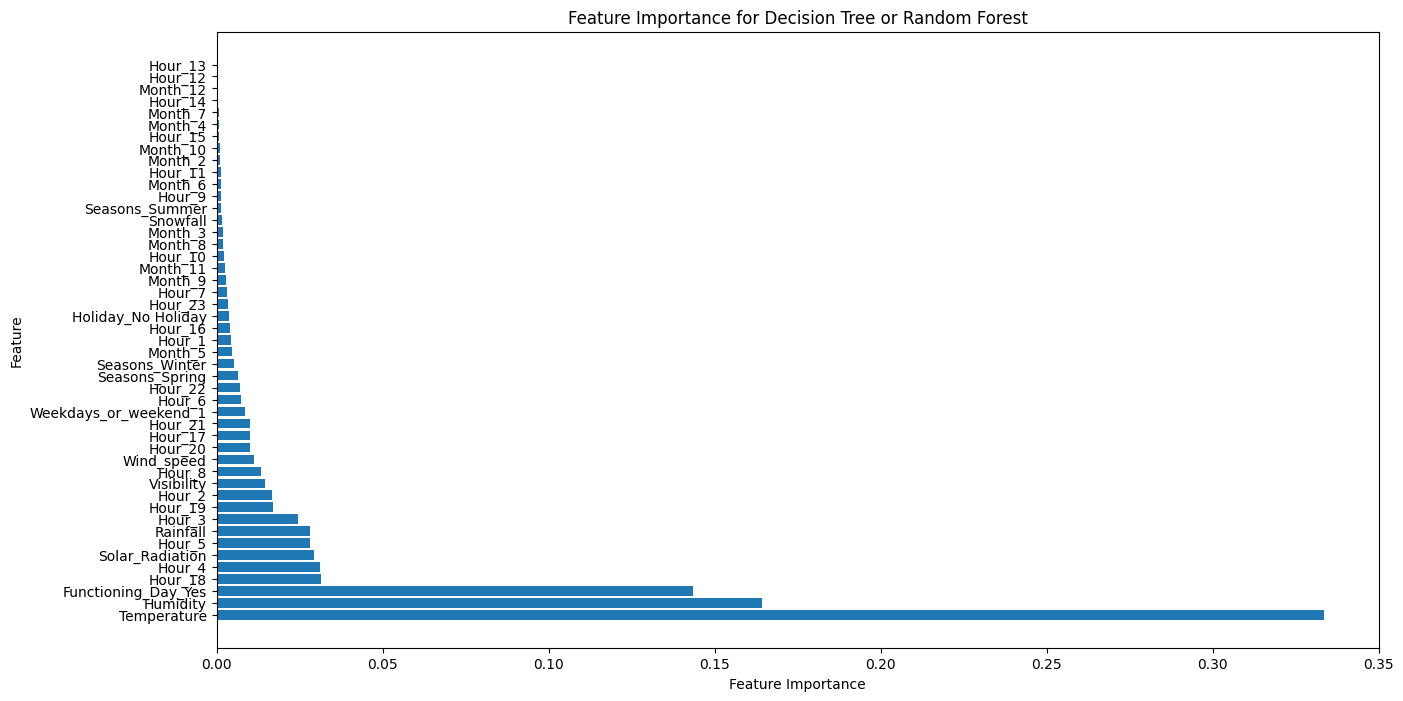

In [156]:
# Plotting feature importances for Decision Tree or Random Forest
plt.figure(figsize=(15, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree or Random Forest')
plt.show()

In [157]:
#Installing the shap library
!pip install shap

In [158]:
# Importing package
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [159]:
# Creating a function to plot the SHAP summary plot
def shap_summary(model, X_train, feature_names, plot_size=(10, 5)):
    explainer_shap = shap.Explainer(model=model, masker=X_train)
    shap_values = explainer_shap.shap_values(X_train)
    plt.figure(figsize=plot_size)  # Set the size of the plot
    shap.summary_plot(shap_values, X_train, feature_names=feature_names)
    plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


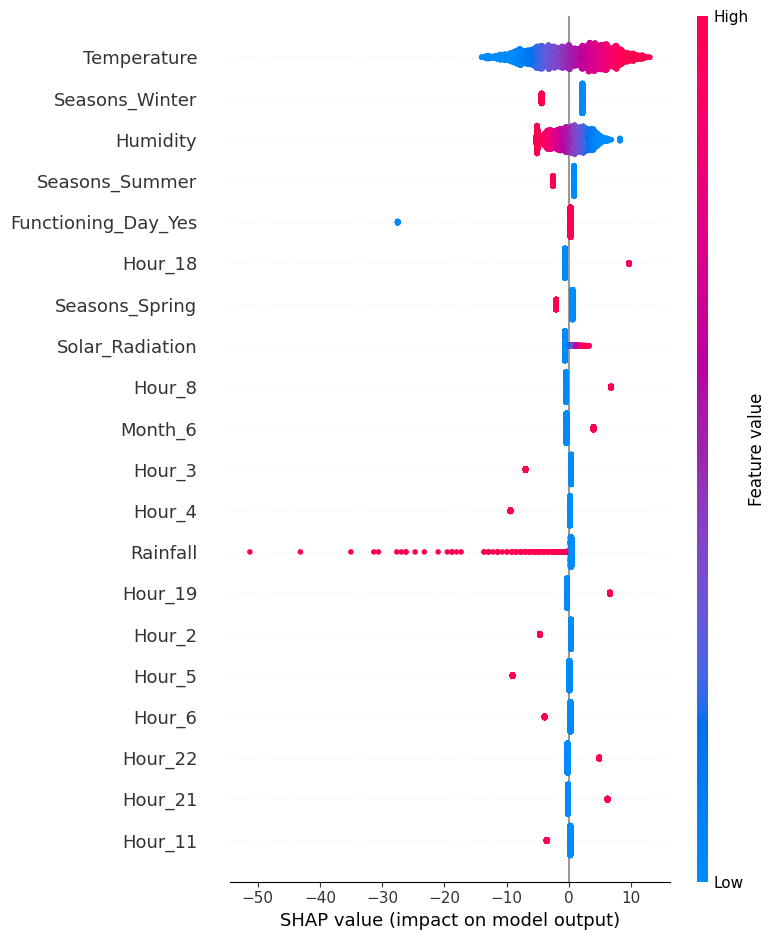

In [160]:
# Assuming you have X_train and X.columns defined somewhere in your code
# Plotting SHAP summary plot for Linear Regression
shap_summary(linear_reg_model, X_train, X.columns,plot_size=(10, 5))

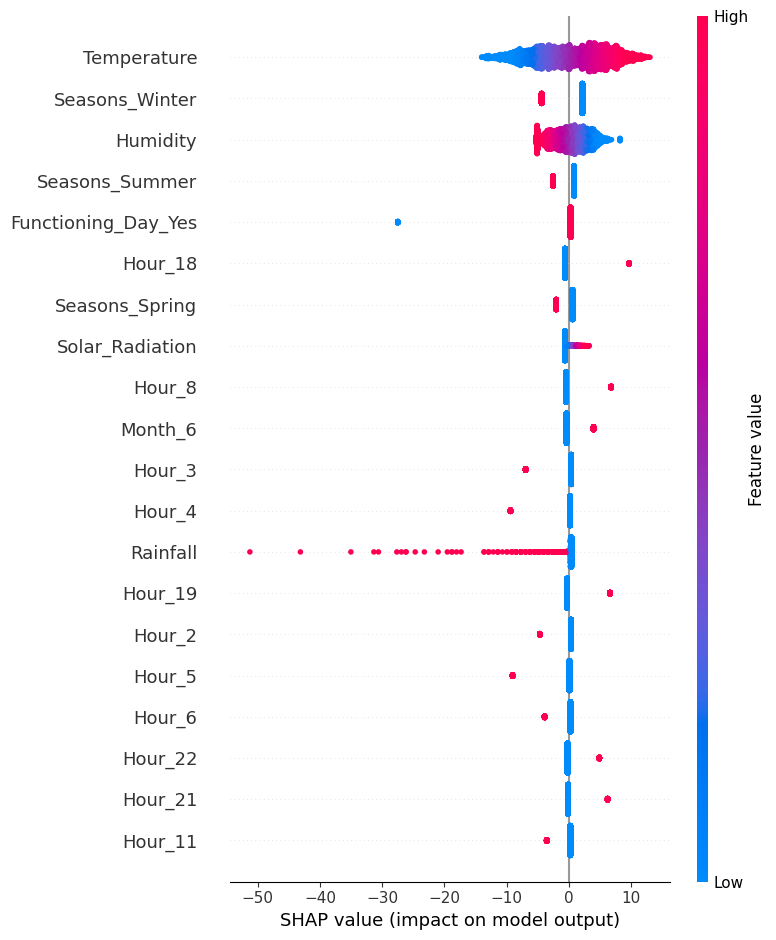

In [161]:
# Plotting SHAP summary plot for Ridge Regression
shap_summary(ridge_reg_model, X_train, X.columns,plot_size=(10, 5))

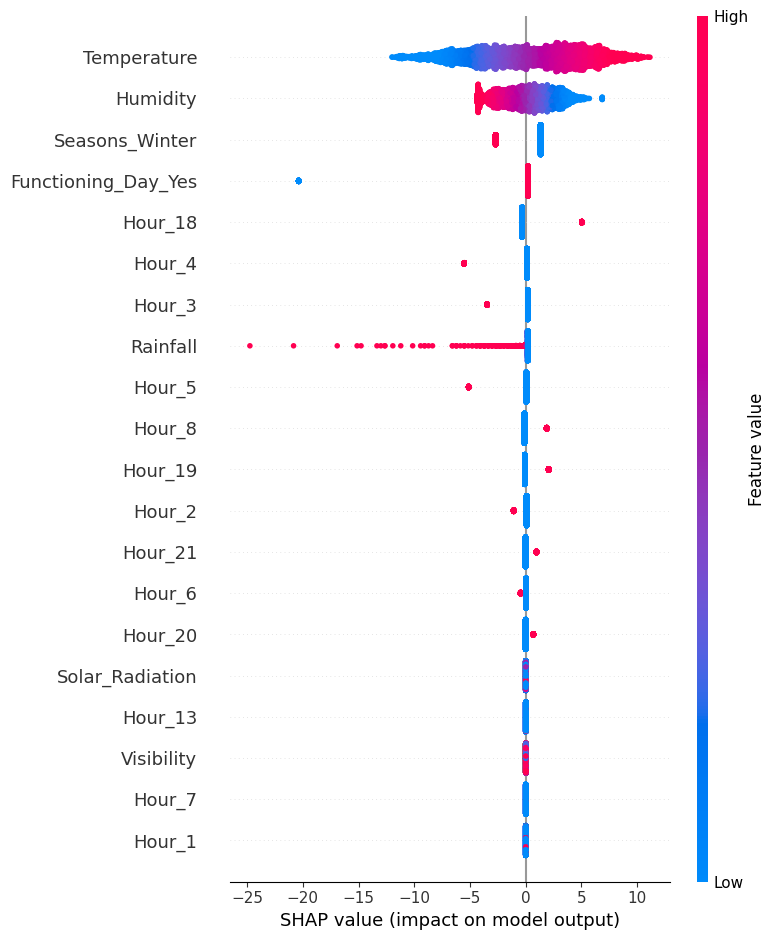

In [162]:
# Plotting SHAP summary plot for Lasso Regression
shap_summary(lasso_model, X_train, X.columns,plot_size=(10, 5))

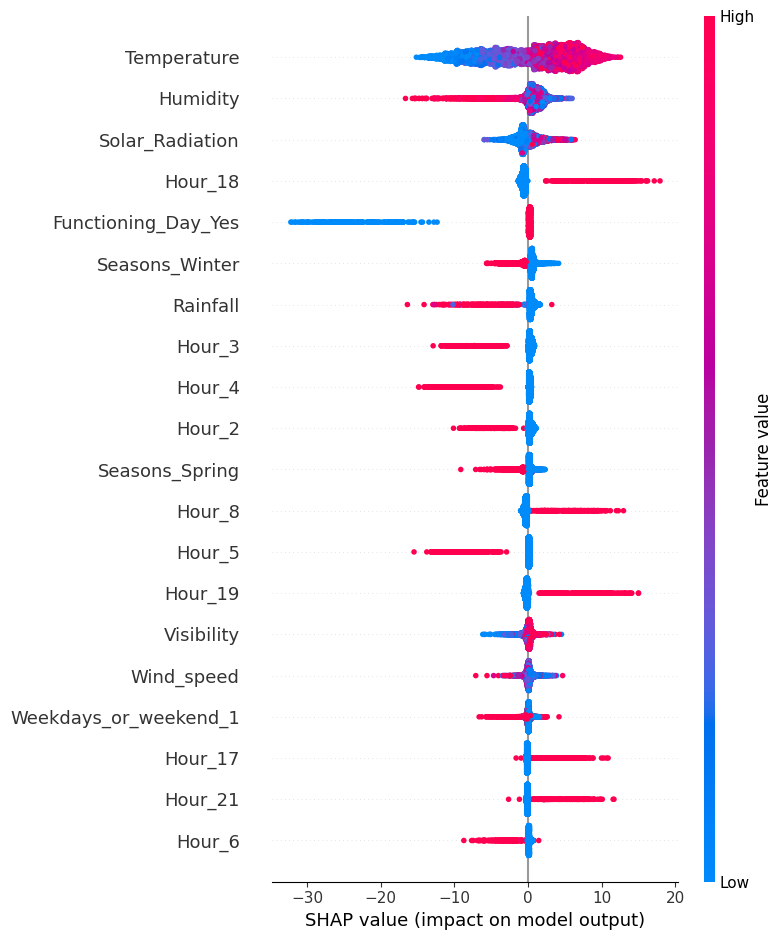

In [163]:
# Plotting SHAP summary plot for Lasso Regression
shap_summary(decision_regressor, X_train, X.columns,plot_size=(10, 5))

100%|===================| 6555/6570 [05:03<00:00]       

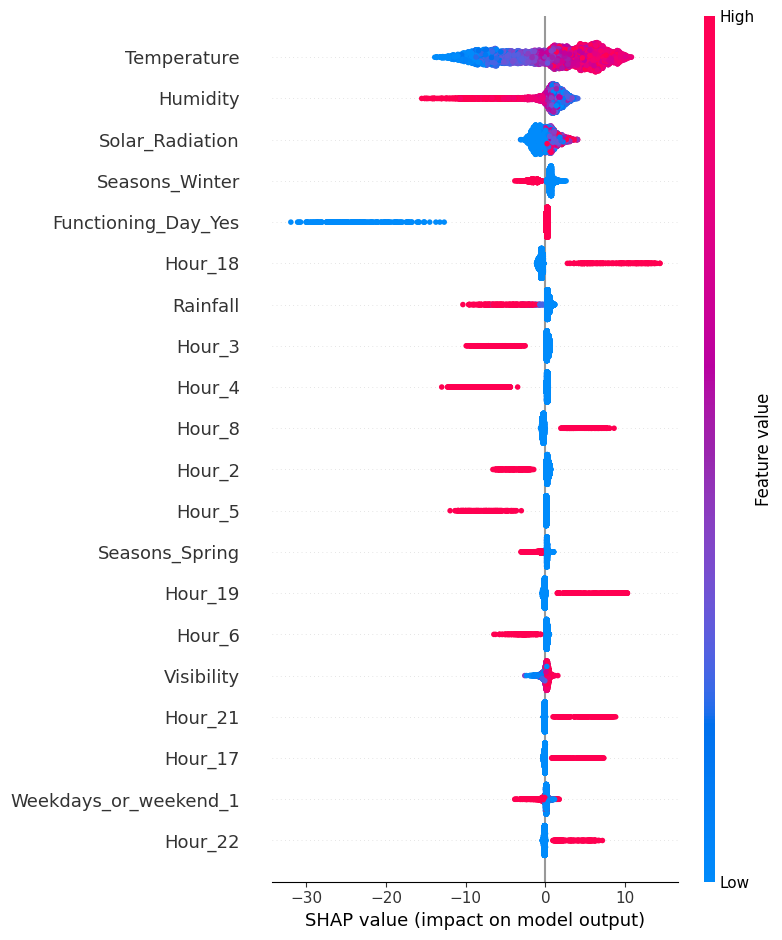

In [165]:
# Plotting SHAP summary plot for Random Forest Regression Model
explainer_shap_rf = shap.Explainer(model=rand_forest, masker=X_train)
shap_values_rf = explainer_shap_rf.shap_values(X_train, check_additivity=False)
shap.summary_plot(shap_values_rf, X_train, feature_names=X.columns)

### **Observations**
- Different models assign varying levels of importance or impact to different features, as revealed by the SHAP summary plots.
- These distinctions in feature importance significantly influence the predictive performance of each model.
- The Random Forest model stands out by assigning substantial impact power to nearly all features, contributing to its superior performance compared to other models like Linear Regression, Ridge Regression, and Lasso Regression.
- Analyzing SHAP summary plots provides insights into both feature importance and the extent of their impact on predictions.
- SHAP values offer valuable information for evaluating and comparing models' performance, as well as understanding the significance of individual features in the prediction process.

# **Conclusion:**
The analysis illuminates distinct patterns in bike rental demand. Weekdays observe heightened activity during office hours, while weekends pivot towards leisure, especially in afternoons. Seasonal variations showcase robust demand in summer, hampered by snowfall in winter. Holidays boost leisure rentals, and mild winds attract more riders. Recognizing these trends can optimize services, aligning with preferences and weather for enhanced user experience. Random Forest and Decision Tree Regressions shine as reliable predictors, leveraging inherent dataset patterns. Lasso Regression, while valuable, struggles with data complexity. Temperature and hour prove pivotal, guiding strategic decisions in bike rental businesses.


## **EDA Findings**


- **Seasonal Patterns:** Bike rental demand peaks between May and October, particularly during summer. The pattern is most prominent on weekdays, indicating higher usage during working days.
  
- **Daily Peaks:** Notable demand spikes occur during 7 AM-9 AM and 5 PM-7 PM, aligning with typical commuting hours.
  
- **Weekends:** On weekends, rentals drop in the morning but rise in the afternoon, specifically from 4 PM to 8 PM, suggesting a more leisure-oriented usage pattern.

- **Functioning Days:** The data demonstrates significantly lower bike usage on non-functioning days, indicating that people primarily rent bikes for work-related commuting.

- **Seasonal Impact:** Summer sees a surge in rentals, while winter experiences a decline due to adverse weather conditions, especially snowfall.

- **Holiday Usage:** Holidays show increased rental activity, notably from 2 PM to 8 PM, indicating leisure-oriented biking during these times.

- **Wind Speed Influence:** There's a notable uptick in demand at a wind speed of 7 m/s, suggesting a preference for biking during gentle breezy conditions.



## **ML Findings**

- **Best Performing Models:** Random Forest Regression and Decision Tree Regression outshine others with impressive R2 scores of 0.899 and 0.813, respectively, indicating their high predictive accuracy.

- **Poor Performer:** Lasso Regression (L1 regularization) lags behind with an R2 score of 0.627, suggesting its limitations in capturing the data's complexity.

- **Visualization Efforts:** All five models were visually compared through actual vs. prediction graphs, providing a tangible understanding of their performance variances.

- **Interpretability:** The SHAP library was utilized to explain the models, shedding light on the intricate relationships between features and predictions.

- **Key Predictors:** Across all models, temperature and hour emerged as consistent pivotal factors, underscoring their substantial influence on bike rental demand.



## **Future Work:**
1. **Fine-Tuning Models:** Enhance models for nuanced predictions, considering hyperparameter tuning and ensemble methods for improved accuracy.
   
2. **Weather Integration:** Integrate real-time weather data for dynamic demand prediction, factoring in rain and temperature fluctuations.
   
3. **User Experience:** Implement user feedback mechanisms to refine services, enhancing customer satisfaction and retention.
   
4. **Predictive Maintenance:** Develop models to predict bike maintenance needs, ensuring a well-maintained fleet for users.
   
5. **Market Expansion:** Explore demographic-specific demand patterns to target specific user segments, expanding market reach effectively.
   
6. **Sustainability:** Explore eco-friendly initiatives, promoting bike rentals as a sustainable commuting alternative, fostering environmental consciousness.